In [ ]:
# Step project

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats
from matplotlib import pyplot as plt
import missingno as msno
import contextlib
import re
import sklearn as sk
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
# Deprecation warnings off
import warnings
warnings.filterwarnings("ignore")

#### 1.Скачайте этот набор данных IKEA.

In [3]:
# Загрузим данные

df_start = pd.read_csv("https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2020/2020-11-03/ikea.csv", index_col=0).drop_duplicates()
df_start.head()

,item_id,name,category,price,old_price,sellable_online,link,other_colors,short_description,designer,depth,height,width
0,90420332,FREKVENS,Bar furniture,265.0,No old price,True,https://www.ikea.com/sa/en/p/frekvens-bar-tabl...,No,"Bar table, in/outdoor, 51x51 cm",Nicholai Wiig Hansen,NaN,99.0,51.0
1,368814,NORDVIKEN,Bar furniture,995.0,No old price,False,https://www.ikea.com/sa/en/p/nordviken-bar-tab...,No,"Bar table, 140x80 cm",Francis Cayouette,NaN,105.0,80.0
2,9333523,NORDVIKEN / NORDVIKEN,Bar furniture,2095.0,No old price,False,https://www.ikea.com/sa/en/p/nordviken-nordvik...,No,Bar table and 4 bar stools,Francis Cayouette,NaN,NaN,NaN
3,80155205,STIG,Bar furniture,69.0,No old price,True,https://www.ikea.com/sa/en/p/stig-bar-stool-wi...,Yes,"Bar stool with backrest, 74 cm",Henrik Preutz,50.0,100.0,60.0
4,30180504,NORBERG,Bar furniture,225.0,No old price,True,https://www.ikea.com/sa/en/p/norberg-wall-moun...,No,"Wall-mounted drop-leaf table, ...",Marcus Arvonen,60.0,43.0,74.0


#### 2. Выполните исследовательский анализ для набора данных, включая описательную статистику и визуализации. Опишите результаты.

In [4]:
df_start.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 3694 entries, 0 to 3693
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   item_id            3694 non-null   int64  
 1   name               3694 non-null   object 
 2   category           3694 non-null   object 
 3   price              3694 non-null   float64
 4   old_price          3694 non-null   object 
 5   sellable_online    3694 non-null   bool   
 6   link               3694 non-null   object 
 7   other_colors       3694 non-null   object 
 8   short_description  3694 non-null   object 
 9   designer           3694 non-null   object 
 10  depth              2231 non-null   float64
 11  height             2706 non-null   float64
 12  width              3105 non-null   float64
dtypes: bool(1), float64(4), int64(1), object(7)
memory usage: 378.8+ KB


<AxesSubplot:>

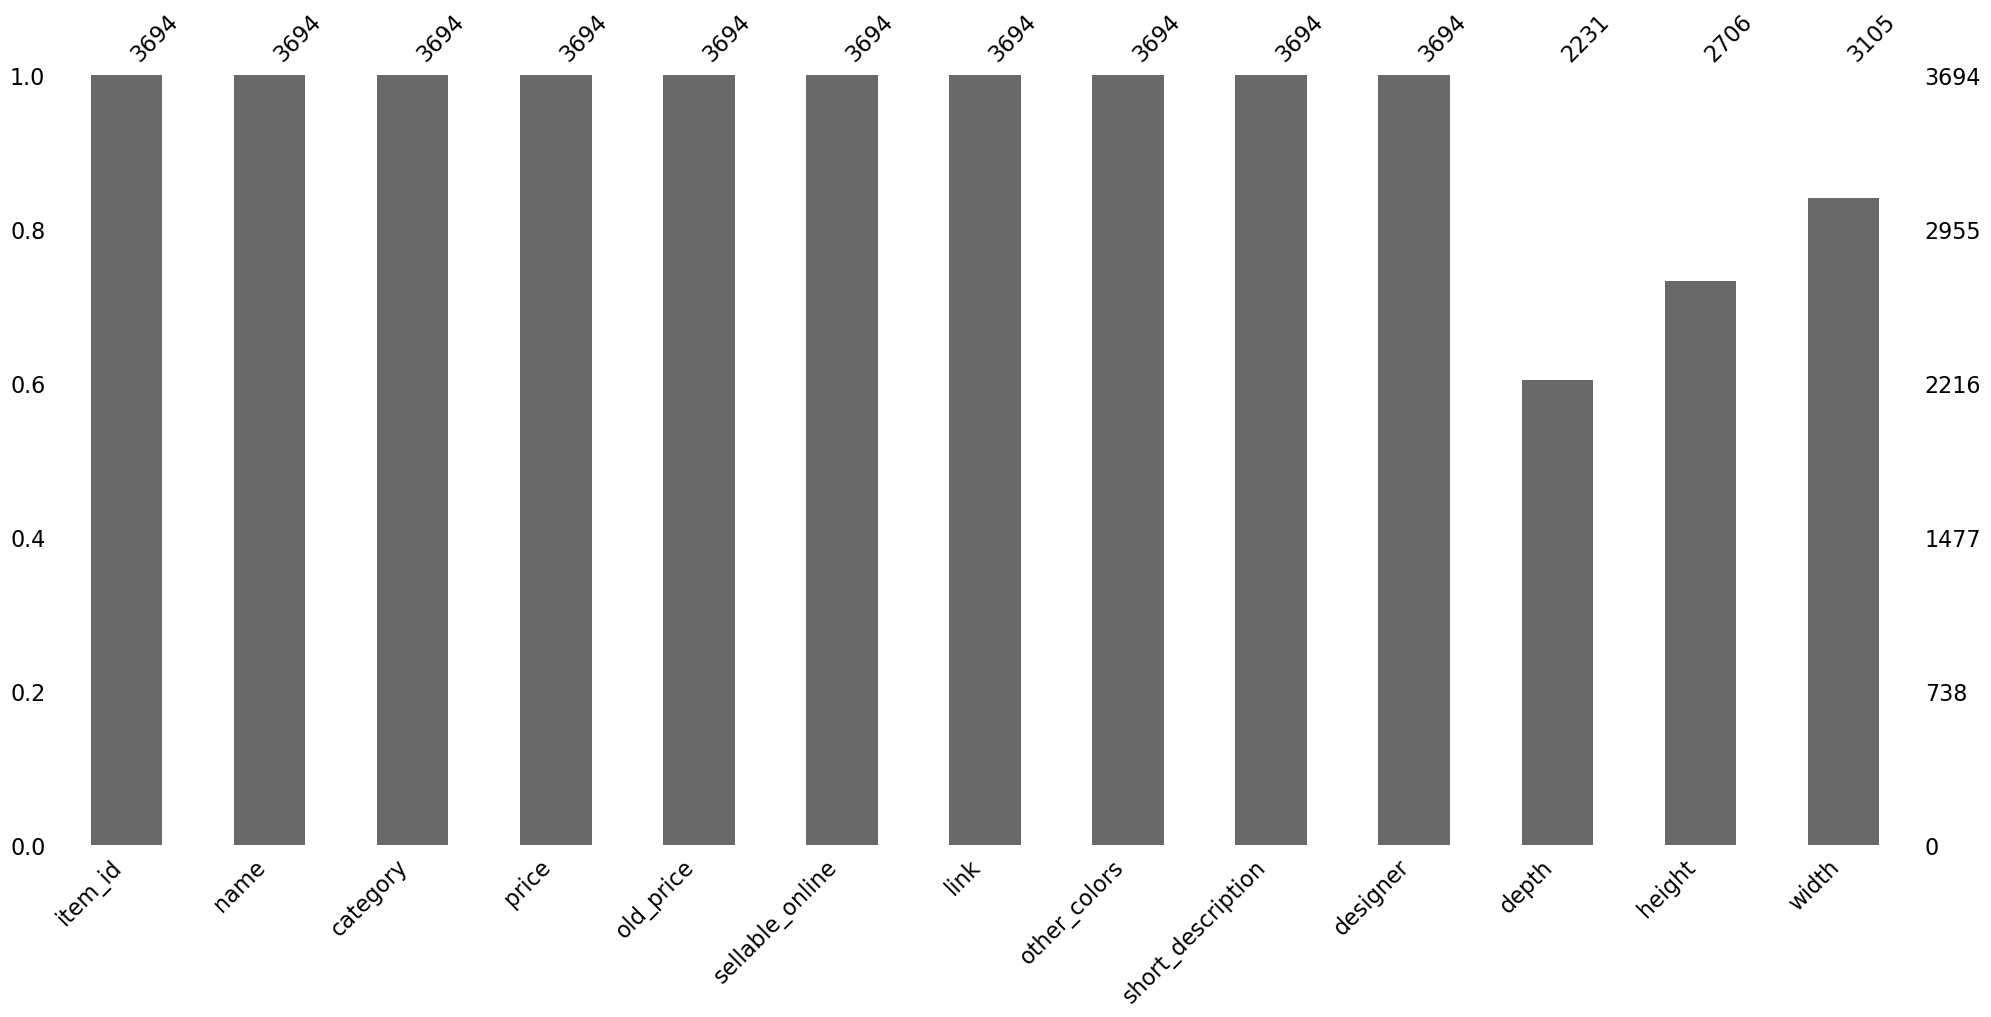

In [5]:
msno.bar(df_start)
# Все данные по 3694 значений, только с размерами (depth, height, width) есть пустые. 

In [6]:
df_start.isnull().sum()


item_id                 0
name                    0
category                0
price                   0
old_price               0
sellable_online         0
link                    0
other_colors            0
short_description       0
designer                0
depth                1463
height                988
width                 589
dtype: int64

In [7]:
df_start.dtypes


item_id                int64
name                  object
category              object
price                float64
old_price             object
sellable_online         bool
link                  object
other_colors          object
short_description     object
designer              object
depth                float64
height               float64
width                float64
dtype: object

In [8]:
df_start.describe(include=[np.number])


,item_id,price,depth,height,width
count,3.694000e+03,3694.000000,2231.000000,2706.000000,3105.000000
mean,4.863240e+07,1078.208419,54.379202,101.679970,104.470853
std,2.888709e+07,1374.652494,29.958351,61.097585,71.133771
min,5.848700e+04,3.000000,1.000000,1.000000,1.000000
25%,2.039057e+07,180.900000,38.000000,67.000000,60.000000
50%,4.928808e+07,544.700000,47.000000,83.000000,80.000000
75%,7.040357e+07,1429.500000,60.000000,124.000000,140.000000
max,9.993262e+07,9585.000000,257.000000,700.000000,420.000000


In [9]:
df_start.describe(include=[np.object])


,name,category,old_price,link,other_colors,short_description,designer
count,3694,3694,3694,3694,3694,3694,3694
unique,607,17,365,2962,2,1706,381
top,BESTÅ,Tables & desks,No old price,https://www.ikea.com/sa/en/p/norraker-norraker...,No,Chair,IKEA of Sweden
freq,173,612,3040,4,2182,59,828


In [10]:
df_start.category.unique()
# Вариантов, которые необходимо объединить, нет, все корректно
# Всего 17 категорий

array(['Bar furniture', 'Beds', 'Bookcases & shelving units',
       'Cabinets & cupboards', 'Café furniture', 'Chairs',
       'Chests of drawers & drawer units', "Children's furniture",
       'Nursery furniture', 'Outdoor furniture', 'Room dividers',
       'Sideboards, buffets & console tables', 'Sofas & armchairs',
       'Tables & desks', 'Trolleys', 'TV & media furniture', 'Wardrobes'],
      dtype=object)

In [11]:
df_start.sellable_online.value_counts()
# Можно удалить столбец 'sellable_online', так как там всего 28 значений, они существенно не повлияют на результат

True     3666
False      28
Name: sellable_online, dtype: int64

In [12]:
df_start.old_price.unique()
# Для дальнейшего использования этих данных необходима трансформация - оставить только цену

array(['No old price', 'SR 2,375', 'SR 295', 'SR 175', 'SR 995',
       'SR 1,385', 'SR 445', 'SR 925', 'SR 2,205', 'SR 895', 'SR 2,435',
       'SR 125', 'SR 1,595', 'SR 2,880', 'SR 940', 'SR 800', 'SR 1,995',
       'SR 3,245', 'SR 8,735', 'SR 2,310', 'SR 2,560', 'SR 3,760',
       'SR 3,130', 'SR 9,745', 'SR 1,885', 'SR 3,265', 'SR 50/4 pack',
       'SR 1,450', 'SR 250', 'SR 1,590', 'SR 2,360', 'SR 4,040',
       'SR 1,715', 'SR 2,100', 'SR 2,395', 'SR 1,250', 'SR 5,610',
       'SR 7,225', 'SR 2,795', 'SR 8,540', 'SR 1,950', 'SR 5,400',
       'SR 375', 'SR 5,045', 'SR 5,640', 'SR 3,665', 'SR 2,095',
       'SR 2,495', 'SR 9,430', 'SR 6,530', 'SR 138', 'SR 350', 'SR 1,023',
       'SR 437', 'SR 1,390', 'SR 50', 'SR 595', 'SR 275', 'SR 395',
       'SR 26', 'SR 695', 'SR 645', 'SR 649', 'SR 232', 'SR 750', 'SR 30',
       'SR 892', 'SR 10', 'SR 490', 'SR 4,185', 'SR 655', 'SR 27',
       'SR 455', 'SR 7', 'SR 657', 'SR 1,120', 'SR 237', 'SR 22',
       'SR 1,180', 'SR 15', 'SR 10/4

In [13]:
df_start.designer.unique()
# Для дальнейшего использования этих данных необходима трансформация - оставить только дизайнеров и в сопоставимом виде

array(['Nicholai Wiig Hansen', 'Francis Cayouette', 'Henrik Preutz',
       'Marcus Arvonen', 'Carina Bengs', 'K Hagberg/M Hagberg',
       'Sarah Fager', 'Ehlén Johansson', 'Nike Karlsson',
       'Maja Ganszyniec', 'Karl Malmvall',
       'John/Jonas/Petrus/Paul/Caroline', 'Nike Karlsson/Maja Ganszyniec',
       'J Karlsson/N Karlsson', 'IKEA of Sweden/Karl Malmvall',
       'IKEA of Sweden', 'Nike Karlsson/J Karlsson/N Karlsson',
       'Ola Wihlborg', 'IKEA of Sweden/Tina Christensen',
       'IKEA of Sweden/K Hagberg/M Hagberg',
       'Ola Wihlborg/IKEA of Sweden',
       '504.689.53 Small and easy-to-place chair-bed which can easily be converted into a single bed.The storage space under the seat has room for bedlinen or other things.Just as nice to look at from all sides – perfect to place in the middle of the room or use as a room divider.The cushion cover is easy to keep clean and fresh, as you can take it off and machine-wash it.Easy to assemble.1 cushion included.',
       '

In [ ]:
# Оптимизируем данные:
# 1) designer - систематизируем данные (designer_clean)
# 2) old_price - извлечем старую цену (old_price_clean)
# 3) short_description - извлечем габариты для заполнения некоторых NaN (description_dwh_clean)
# 4) удалим столбцы 'item_id', 'link', 'sellable_online', 'short_description'


In [18]:
df_act = df_start

In [15]:
df_act.head()

,item_id,name,category,price,old_price,sellable_online,link,other_colors,short_description,designer,depth,height,width
0,90420332,FREKVENS,Bar furniture,265.0,No old price,True,https://www.ikea.com/sa/en/p/frekvens-bar-tabl...,No,"Bar table, in/outdoor, 51x51 cm",Nicholai Wiig Hansen,NaN,99.0,51.0
1,368814,NORDVIKEN,Bar furniture,995.0,No old price,False,https://www.ikea.com/sa/en/p/nordviken-bar-tab...,No,"Bar table, 140x80 cm",Francis Cayouette,NaN,105.0,80.0
2,9333523,NORDVIKEN / NORDVIKEN,Bar furniture,2095.0,No old price,False,https://www.ikea.com/sa/en/p/nordviken-nordvik...,No,Bar table and 4 bar stools,Francis Cayouette,NaN,NaN,NaN
3,80155205,STIG,Bar furniture,69.0,No old price,True,https://www.ikea.com/sa/en/p/stig-bar-stool-wi...,Yes,"Bar stool with backrest, 74 cm",Henrik Preutz,50.0,100.0,60.0
4,30180504,NORBERG,Bar furniture,225.0,No old price,True,https://www.ikea.com/sa/en/p/norberg-wall-moun...,No,"Wall-mounted drop-leaf table, ...",Marcus Arvonen,60.0,43.0,74.0


In [7]:
# 1) designer - систематизируем данные (designer_clean)

In [19]:
def cleanDesigners(value, removeIKEA=False, emptyValue=np.nan):
    
    if not isinstance(value, str):
        return value
    if len(value)>0 and value[0].isdigit():
        return emptyValue
    designers = value.split('/')
    if removeIKEA:
        with contextlib.suppress(Exception):
            designers.remove("IKEA of Sweden")
    return '/'.join(sorted(designers)) if len(designers)>0 else emptyValue

df_act['designer_clean'] = df_act['designer'].apply(cleanDesigners, args=(False, "IKEA of Sweden"))
df_act.head()

,item_id,name,category,price,old_price,sellable_online,link,other_colors,short_description,designer,depth,height,width,designer_clean,old_price_clean
0,90420332,FREKVENS,Bar furniture,265.0,No old price,True,https://www.ikea.com/sa/en/p/frekvens-bar-tabl...,No,"Bar table, in/outdoor, 51x51 cm",Nicholai Wiig Hansen,NaN,99.0,51.0,Nicholai Wiig Hansen,No old price
1,368814,NORDVIKEN,Bar furniture,995.0,No old price,False,https://www.ikea.com/sa/en/p/nordviken-bar-tab...,No,"Bar table, 140x80 cm",Francis Cayouette,NaN,105.0,80.0,Francis Cayouette,No old price
2,9333523,NORDVIKEN / NORDVIKEN,Bar furniture,2095.0,No old price,False,https://www.ikea.com/sa/en/p/nordviken-nordvik...,No,Bar table and 4 bar stools,Francis Cayouette,NaN,NaN,NaN,Francis Cayouette,No old price
3,80155205,STIG,Bar furniture,69.0,No old price,True,https://www.ikea.com/sa/en/p/stig-bar-stool-wi...,Yes,"Bar stool with backrest, 74 cm",Henrik Preutz,50.0,100.0,60.0,Henrik Preutz,No old price
4,30180504,NORBERG,Bar furniture,225.0,No old price,True,https://www.ikea.com/sa/en/p/norberg-wall-moun...,No,"Wall-mounted drop-leaf table, ...",Marcus Arvonen,60.0,43.0,74.0,Marcus Arvonen,No old price


In [ ]:
# 2) old_price - извлечем старую цену (old_price_clean)

In [20]:

def CleanOldPrice(value):
    if isinstance(value, str) and value != 'No old price': 
        clean_old_price = re.search(r'\d+\.\d+|\d+', re.sub(',','', str(value))).group(0)
        clean_old_price = float(clean_old_price)
    else:
        clean_old_price = value
    return clean_old_price

df_act['old_price_clean'] = df_act['old_price'].apply(CleanOldPrice)
df_act.head()

,item_id,name,category,price,old_price,sellable_online,link,other_colors,short_description,designer,depth,height,width,designer_clean,old_price_clean
0,90420332,FREKVENS,Bar furniture,265.0,No old price,True,https://www.ikea.com/sa/en/p/frekvens-bar-tabl...,No,"Bar table, in/outdoor, 51x51 cm",Nicholai Wiig Hansen,NaN,99.0,51.0,Nicholai Wiig Hansen,No old price
1,368814,NORDVIKEN,Bar furniture,995.0,No old price,False,https://www.ikea.com/sa/en/p/nordviken-bar-tab...,No,"Bar table, 140x80 cm",Francis Cayouette,NaN,105.0,80.0,Francis Cayouette,No old price
2,9333523,NORDVIKEN / NORDVIKEN,Bar furniture,2095.0,No old price,False,https://www.ikea.com/sa/en/p/nordviken-nordvik...,No,Bar table and 4 bar stools,Francis Cayouette,NaN,NaN,NaN,Francis Cayouette,No old price
3,80155205,STIG,Bar furniture,69.0,No old price,True,https://www.ikea.com/sa/en/p/stig-bar-stool-wi...,Yes,"Bar stool with backrest, 74 cm",Henrik Preutz,50.0,100.0,60.0,Henrik Preutz,No old price
4,30180504,NORBERG,Bar furniture,225.0,No old price,True,https://www.ikea.com/sa/en/p/norberg-wall-moun...,No,"Wall-mounted drop-leaf table, ...",Marcus Arvonen,60.0,43.0,74.0,Marcus Arvonen,No old price


In [ ]:
# 3) short_description - извлечем габариты для заполнения некоторых NaN (description_dwh_clean)

In [21]:
def CleanDescription_dwh(value):
    tmp = []
    d, w, h = np.NaN, np.NaN, np.NaN
    if bool(re.search(r'\d+x\d+/\d+ cm', value)):
        tmp = re.findall(r'\d+', re.search(r'\d+x\d+/\d+ cm', value).group(0))
        d, w, h = tmp
    else:
        if bool(re.search(r'\d+x\d+ cm', value)):
            tmp = re.findall(r'\d+', re.search(r'\d+x\d+ cm', value).group(0))
            d, w = tmp
        else:
            if bool(re.search(r'\d+ cm', value)):
                tmp = re.findall(r'\d+', re.search(r'\d+ cm', value).group(0))
                h = tmp[0]
    return d,w,h

df_act['description_dwh_clean'] = df_act['short_description'].apply(CleanDescription_dwh)
df_act.head()

# Как видно по данным, габариты из описания не всегда совпадают с габаритами из соответствующих столбцов. 
# Поэтому данными из описания мы воспользуемся только для тех строк, где в соответствующих начальных данных указан NaN 
# (для минимизации неточностей).

,item_id,name,category,price,old_price,sellable_online,link,other_colors,short_description,designer,depth,height,width,designer_clean,old_price_clean,description_dwh_clean
0,90420332,FREKVENS,Bar furniture,265.0,No old price,True,https://www.ikea.com/sa/en/p/frekvens-bar-tabl...,No,"Bar table, in/outdoor, 51x51 cm",Nicholai Wiig Hansen,NaN,99.0,51.0,Nicholai Wiig Hansen,No old price,"(51, 51, nan)"
1,368814,NORDVIKEN,Bar furniture,995.0,No old price,False,https://www.ikea.com/sa/en/p/nordviken-bar-tab...,No,"Bar table, 140x80 cm",Francis Cayouette,NaN,105.0,80.0,Francis Cayouette,No old price,"(140, 80, nan)"
2,9333523,NORDVIKEN / NORDVIKEN,Bar furniture,2095.0,No old price,False,https://www.ikea.com/sa/en/p/nordviken-nordvik...,No,Bar table and 4 bar stools,Francis Cayouette,NaN,NaN,NaN,Francis Cayouette,No old price,"(nan, nan, nan)"
3,80155205,STIG,Bar furniture,69.0,No old price,True,https://www.ikea.com/sa/en/p/stig-bar-stool-wi...,Yes,"Bar stool with backrest, 74 cm",Henrik Preutz,50.0,100.0,60.0,Henrik Preutz,No old price,"(nan, nan, 74)"
4,30180504,NORBERG,Bar furniture,225.0,No old price,True,https://www.ikea.com/sa/en/p/norberg-wall-moun...,No,"Wall-mounted drop-leaf table, ...",Marcus Arvonen,60.0,43.0,74.0,Marcus Arvonen,No old price,"(74, 60, nan)"


In [22]:

df_act['depth_clean'] = df_act['depth']

for i in range(len(df_act)):
    if np.isnan(df_act.loc[i]['depth_clean']):
        df_act['depth_clean'][i] = df_act.loc[i]['description_dwh_clean'][0]
        
df_act['width_clean'] = df_act['width']

for i in range(len(df_act)):
    if np.isnan(df_act.loc[i]['width_clean']):
        df_act['width_clean'][i] = df_act.loc[i]['description_dwh_clean'][1]

df_act['height_clean'] = df_act['height']

for i in range(len(df_act)):
    if np.isnan(df_act.loc[i]['height_clean']):
        df_act['height_clean'][i] = df_act.loc[i]['description_dwh_clean'][2]
        
df_act.head()


,item_id,name,category,price,old_price,sellable_online,link,other_colors,short_description,designer,depth,height,width,designer_clean,old_price_clean,description_dwh_clean,depth_clean,width_clean,height_clean
0,90420332,FREKVENS,Bar furniture,265.0,No old price,True,https://www.ikea.com/sa/en/p/frekvens-bar-tabl...,No,"Bar table, in/outdoor, 51x51 cm",Nicholai Wiig Hansen,NaN,99.0,51.0,Nicholai Wiig Hansen,No old price,"(51, 51, nan)",51,51.0,99.0
1,368814,NORDVIKEN,Bar furniture,995.0,No old price,False,https://www.ikea.com/sa/en/p/nordviken-bar-tab...,No,"Bar table, 140x80 cm",Francis Cayouette,NaN,105.0,80.0,Francis Cayouette,No old price,"(140, 80, nan)",140,80.0,105.0
2,9333523,NORDVIKEN / NORDVIKEN,Bar furniture,2095.0,No old price,False,https://www.ikea.com/sa/en/p/nordviken-nordvik...,No,Bar table and 4 bar stools,Francis Cayouette,NaN,NaN,NaN,Francis Cayouette,No old price,"(nan, nan, nan)",NaN,NaN,NaN
3,80155205,STIG,Bar furniture,69.0,No old price,True,https://www.ikea.com/sa/en/p/stig-bar-stool-wi...,Yes,"Bar stool with backrest, 74 cm",Henrik Preutz,50.0,100.0,60.0,Henrik Preutz,No old price,"(nan, nan, 74)",50.0,60.0,100.0
4,30180504,NORBERG,Bar furniture,225.0,No old price,True,https://www.ikea.com/sa/en/p/norberg-wall-moun...,No,"Wall-mounted drop-leaf table, ...",Marcus Arvonen,60.0,43.0,74.0,Marcus Arvonen,No old price,"(74, 60, nan)",60.0,74.0,43.0


In [23]:
print(df_act.isnull().sum())
# Проверим, насколько данные из 'short_description' помогли уменьшить количество пустых значений.
# depth: (1463 - 679) / 1463 = 54%
# height: (988 - 807) / 988 = 18%
# width: (589 - 534) / 589 = 9%        

item_id                     0
name                        0
category                    0
price                       0
old_price                   0
sellable_online             0
link                        0
other_colors                0
short_description           0
designer                    0
depth                    1463
height                    988
width                     589
designer_clean              0
old_price_clean             0
description_dwh_clean       0
depth_clean               679
width_clean               534
height_clean              807
dtype: int64


In [24]:
df_act.dtypes
# Проверим типы данных новых столбцов

item_id                    int64
name                      object
category                  object
price                    float64
old_price                 object
sellable_online             bool
link                      object
other_colors              object
short_description         object
designer                  object
depth                    float64
height                   float64
width                    float64
designer_clean            object
old_price_clean           object
description_dwh_clean     object
depth_clean               object
width_clean               object
height_clean              object
dtype: object

In [25]:
# Необходимо числовые данные трансформировать в правильный тип данных

df_act['depth_clean'] = df_act['depth_clean'].astype(float)
df_act['width_clean'] = df_act['width_clean'].astype(float)
df_act['height_clean'] = df_act['height_clean'].astype(float)
df_act.dtypes

item_id                    int64
name                      object
category                  object
price                    float64
old_price                 object
sellable_online             bool
link                      object
other_colors              object
short_description         object
designer                  object
depth                    float64
height                   float64
width                    float64
designer_clean            object
old_price_clean           object
description_dwh_clean     object
depth_clean              float64
width_clean              float64
height_clean             float64
dtype: object

In [26]:
# Удалим ненужные столбцы

df_act = df_start.drop(['item_id', 'link', 'sellable_online', 'description_dwh_clean', 'short_description'], axis=1)

In [27]:
df_act.head()

,name,category,price,old_price,other_colors,designer,depth,height,width,designer_clean,old_price_clean,depth_clean,width_clean,height_clean
0,FREKVENS,Bar furniture,265.0,No old price,No,Nicholai Wiig Hansen,NaN,99.0,51.0,Nicholai Wiig Hansen,No old price,51.0,51.0,99.0
1,NORDVIKEN,Bar furniture,995.0,No old price,No,Francis Cayouette,NaN,105.0,80.0,Francis Cayouette,No old price,140.0,80.0,105.0
2,NORDVIKEN / NORDVIKEN,Bar furniture,2095.0,No old price,No,Francis Cayouette,NaN,NaN,NaN,Francis Cayouette,No old price,NaN,NaN,NaN
3,STIG,Bar furniture,69.0,No old price,Yes,Henrik Preutz,50.0,100.0,60.0,Henrik Preutz,No old price,50.0,60.0,100.0
4,NORBERG,Bar furniture,225.0,No old price,No,Marcus Arvonen,60.0,43.0,74.0,Marcus Arvonen,No old price,60.0,74.0,43.0


In [28]:
df_act.describe(include=[np.number])

,price,depth,height,width,depth_clean,width_clean,height_clean
count,3694.000000,2231.000000,2706.000000,3105.000000,3015.000000,3160.000000,2887.000000
mean,1078.208419,54.379202,101.679970,104.470853,70.718408,104.555696,104.860409
std,1374.652494,29.958351,61.097585,71.133771,49.138382,71.189634,66.122387
min,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,180.900000,38.000000,67.000000,60.000000,40.000000,60.000000,67.000000
50%,544.700000,47.000000,83.000000,80.000000,51.000000,80.000000,83.000000
75%,1429.500000,60.000000,124.000000,140.000000,88.000000,141.000000,134.000000
max,9585.000000,257.000000,700.000000,420.000000,420.000000,420.000000,700.000000


In [29]:
df_act.describe(include=[np.object])

,name,category,old_price,other_colors,designer,designer_clean,old_price_clean
count,3694,3694,3694,3694,3694,3694,3694
unique,607,17,365,2,381,199,360
top,BESTÅ,Tables & desks,No old price,No,IKEA of Sweden,IKEA of Sweden,No old price
freq,173,612,3040,2182,828,971,3040


In [ ]:
# Выводы:
# База данных содержит информацию об ассортименте IKEA (мебель). 
# Представлена информация о товарах из 17 категорий, их цены, габариты, дизайнеры и другие дополнительные данные.

# Всего товаров - 3694. NaN-значения содержатся только в столбцах с данными по габаритам. Частично (от 54% до 9%) от них 
# удалось избавиться благодаря информации в столбце с описанием.

# Статистические данные по числовым и категорийным параметрам представлены выше.


In [ ]:
#  Графики


In [29]:
df_act.head()

,name,category,price,old_price,other_colors,designer,depth,height,width,designer_clean,old_price_clean,depth_clean,width_clean,height_clean
0,FREKVENS,Bar furniture,265.0,No old price,No,Nicholai Wiig Hansen,NaN,99.0,51.0,Nicholai Wiig Hansen,No old price,51.0,51.0,99.0
1,NORDVIKEN,Bar furniture,995.0,No old price,No,Francis Cayouette,NaN,105.0,80.0,Francis Cayouette,No old price,140.0,80.0,105.0
2,NORDVIKEN / NORDVIKEN,Bar furniture,2095.0,No old price,No,Francis Cayouette,NaN,NaN,NaN,Francis Cayouette,No old price,NaN,NaN,NaN
3,STIG,Bar furniture,69.0,No old price,Yes,Henrik Preutz,50.0,100.0,60.0,Henrik Preutz,No old price,50.0,60.0,100.0
4,NORBERG,Bar furniture,225.0,No old price,No,Marcus Arvonen,60.0,43.0,74.0,Marcus Arvonen,No old price,60.0,74.0,43.0


In [ ]:
# Распределение категориальных данных с сортировкой

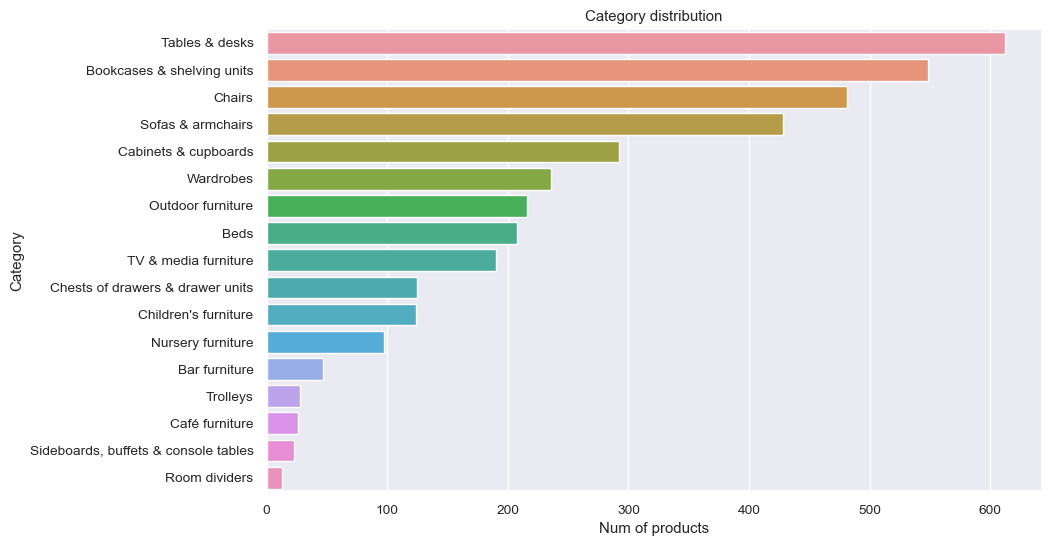

In [113]:
# Распределение для 'category'

sns.set_theme(context='notebook', style='darkgrid', palette="husl", font='sans-serif', font_scale=0.9, color_codes=True, rc=None)
plt.figure(figsize=(10, 6))
sns.countplot(y='category', data=df_act, order = df_act['category'].value_counts().index)
plt.title('Category distribution')
plt.ylabel('Category')
plt.xlabel('Num of products')
plt.show()

# Самые численные категории: Tables & desks, Bookcases & shelving units, Chairs, Sofas & armchairs

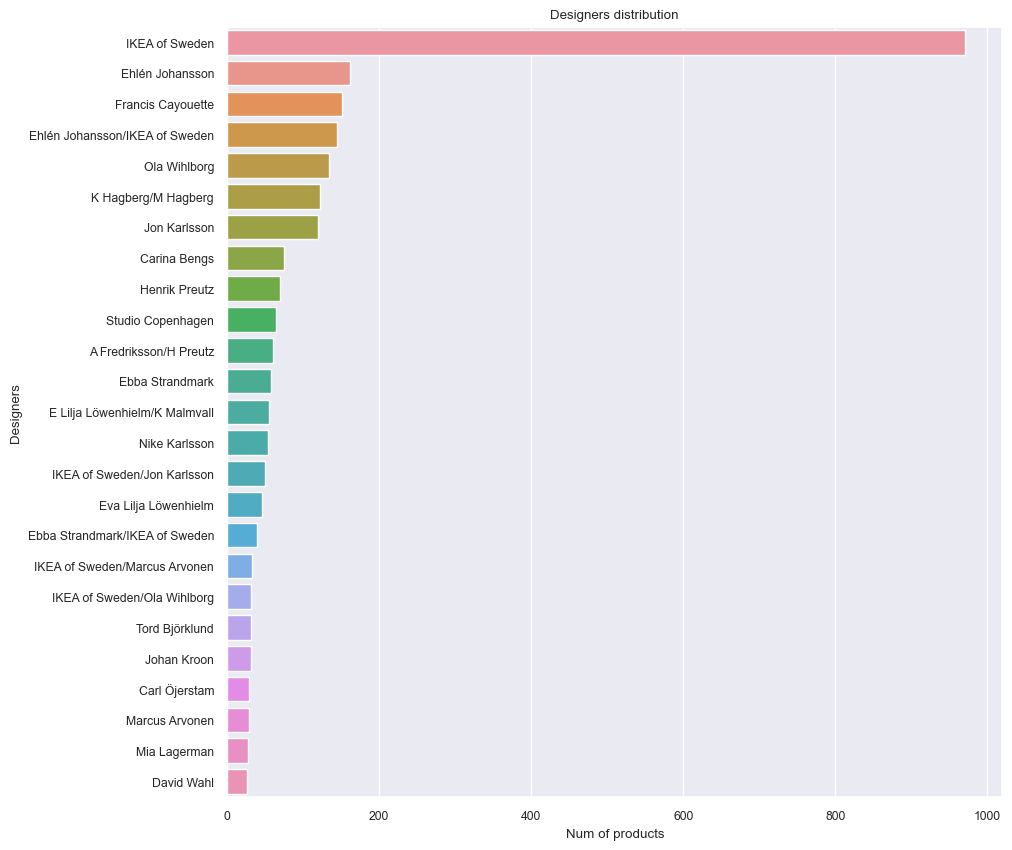

In [124]:
# Распределение для 'designer_clean'

sns.set_theme(context='notebook', style='darkgrid', palette='husl', font='sans-serif', font_scale=0.8, color_codes=True, rc=None)
plt.figure(figsize=(10, 10))
sns.countplot(y='designer_clean', data=df_act, order = df_act['designer_clean'].value_counts().iloc[:25].index)
plt.title('Designers distribution')
plt.ylabel('Designers')
plt.xlabel('Num of products')
plt.show()

# По статистическим данным уникальных значений в столбце 'designer_clean' 199. 
# Для информативности графика выведем только первые 25.

In [188]:
df_act['designer_clean'].value_counts().iloc[:7]

# Самая численная группа: IKEA of Sweden. Неизвестно, что в нее входит (возможно, частный бренд IKEA). 
# По численности она больше в 6 раз от других лидеров рейтинга.
# Среди остальных дизайнеров ТОП-6 (выделяются по численности от других) представлены в таблице ниже.

IKEA of Sweden                    971
Ehlén Johansson                   161
Francis Cayouette                 151
Ehlén Johansson/IKEA of Sweden    145
Ola Wihlborg                      134
K Hagberg/M Hagberg               122
Jon Karlsson                      120
Name: designer_clean, dtype: int64

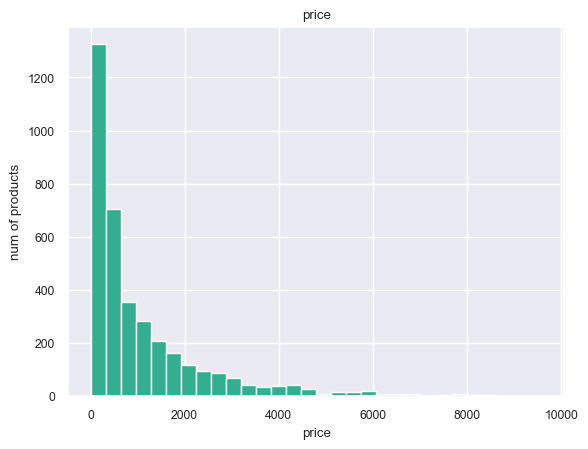

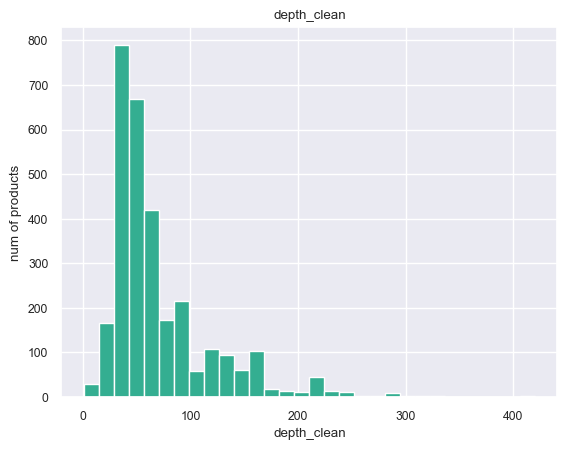

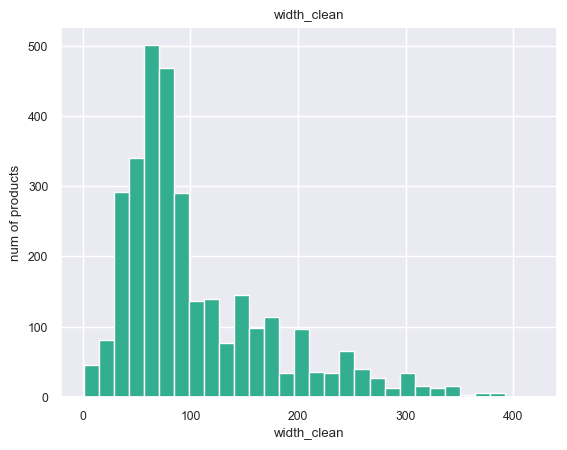

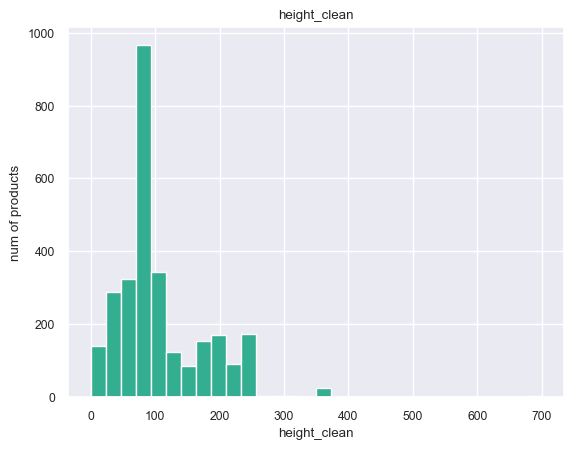

In [174]:
# Распределения для численных данных

for col in ['price', 'depth_clean', 'width_clean', 'height_clean']:
    plt.hist(df_act[col], bins=30, color=sns.color_palette(sns.color_palette("husl", 9)).as_hex()[4])
    plt.xlabel(col)
    plt.ylabel('num of products')
    plt.title(col)
    plt.show()

# Возможные типы распределения:
# price - Log Normal, Poisson, Exponential
# depth_clean - Log Normal, Poisson
# width_clean - Log Normal, Poisson
# height_clean - Log Normal, Poisson

In [15]:
# Отдельно проведем анализ по old_price_clean

# Данные со старой ценой

df_act_old_price = df_act[df_act['old_price_clean'] != 'No old price']
df_act_old_price['old_price_clean'] = df_act_old_price['old_price_clean'].astype(float)
df_act_old_price.head(20)

,name,category,price,old_price,other_colors,designer,depth,height,width,designer_clean,old_price_clean,depth_clean,width_clean,height_clean
9,EKEDALEN / EKEDALEN,Bar furniture,2176.0,"SR 2,375",No,Ehlén Johansson,NaN,NaN,NaN,Ehlén Johansson,2375.0,NaN,NaN,NaN
13,FREKVENS,Bar furniture,177.0,SR 295,No,Nicholai Wiig Hansen,53.0,104.0,43.0,Nicholai Wiig Hansen,295.0,53.0,43.0,104.0
17,KULLABERG,Bar furniture,140.0,SR 175,Yes,Sarah Fager,36.0,NaN,36.0,Sarah Fager,175.0,36.0,36.0,NaN
23,EKEDALEN,Bar furniture,796.0,SR 995,No,Ehlén Johansson,NaN,105.0,80.0,Ehlén Johansson,995.0,120.0,80.0,105.0
26,EKEDALEN,Bar furniture,796.0,SR 995,No,Ehlén Johansson,NaN,105.0,80.0,Ehlén Johansson,995.0,120.0,80.0,105.0
32,NORRÅKER / NORRÅKER,Bar furniture,1266.0,"SR 1,385",No,J Karlsson/N Karlsson,NaN,NaN,NaN,J Karlsson/N Karlsson,1385.0,NaN,NaN,74.0
39,EKEDALEN / EKEDALEN,Bar furniture,2176.0,"SR 2,375",No,Ehlén Johansson,NaN,NaN,NaN,Ehlén Johansson,2375.0,NaN,NaN,120.0
42,NORRÅKER / NORRARYD,Bar furniture,1266.0,"SR 1,385",No,Nike Karlsson/J Karlsson/N Karlsson,NaN,NaN,NaN,J Karlsson/N Karlsson/Nike Karlsson,1385.0,NaN,NaN,74.0
45,NORRÅKER / NORRÅKER,Bar furniture,1266.0,"SR 1,385",No,J Karlsson/N Karlsson,NaN,NaN,NaN,J Karlsson/N Karlsson,1385.0,NaN,NaN,74.0
47,MINNEN,Beds,395.0,SR 445,No,IKEA of Sweden/Tina Christensen,NaN,NaN,85.0,IKEA of Sweden/Tina Christensen,445.0,80.0,85.0,NaN


<AxesSubplot:ylabel='price'>

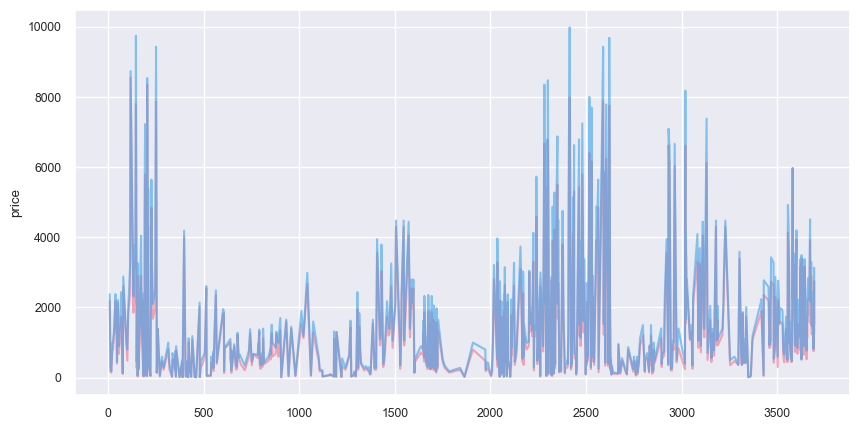

In [172]:
plt.figure(figsize=(10, 5))
sns.lineplot(data=df_act_old_price["price"], color=sns.color_palette(sns.color_palette("husl",9)).as_hex()[0], alpha=0.6)
sns.lineplot(data=df_act_old_price["old_price_clean"], color=sns.color_palette(sns.color_palette("husl",9)).as_hex()[6], alpha=0.6)

# Графики коррелируют

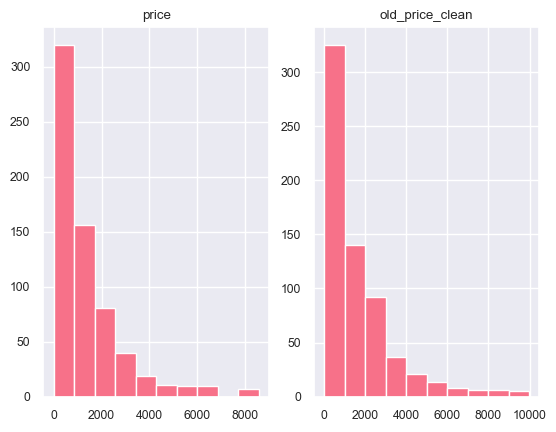

In [145]:

fig, axs = plt.subplots(1,2)
axs[0].hist(df_act_old_price['price'], bins=10)
axs[0].set_title('price')
axs[1].hist(df_act_old_price['old_price_clean'], bins=10)
axs[1].set_title('old_price_clean')
plt.show()

# Распределения очень похожи, вероятно, относятся к одному типу
# Возможные типы распределения:
# price - Log Normal, Poisson, Exponential

In [ ]:
# Рассмотрим распределения численных данных совместно с категориальными
# price - category

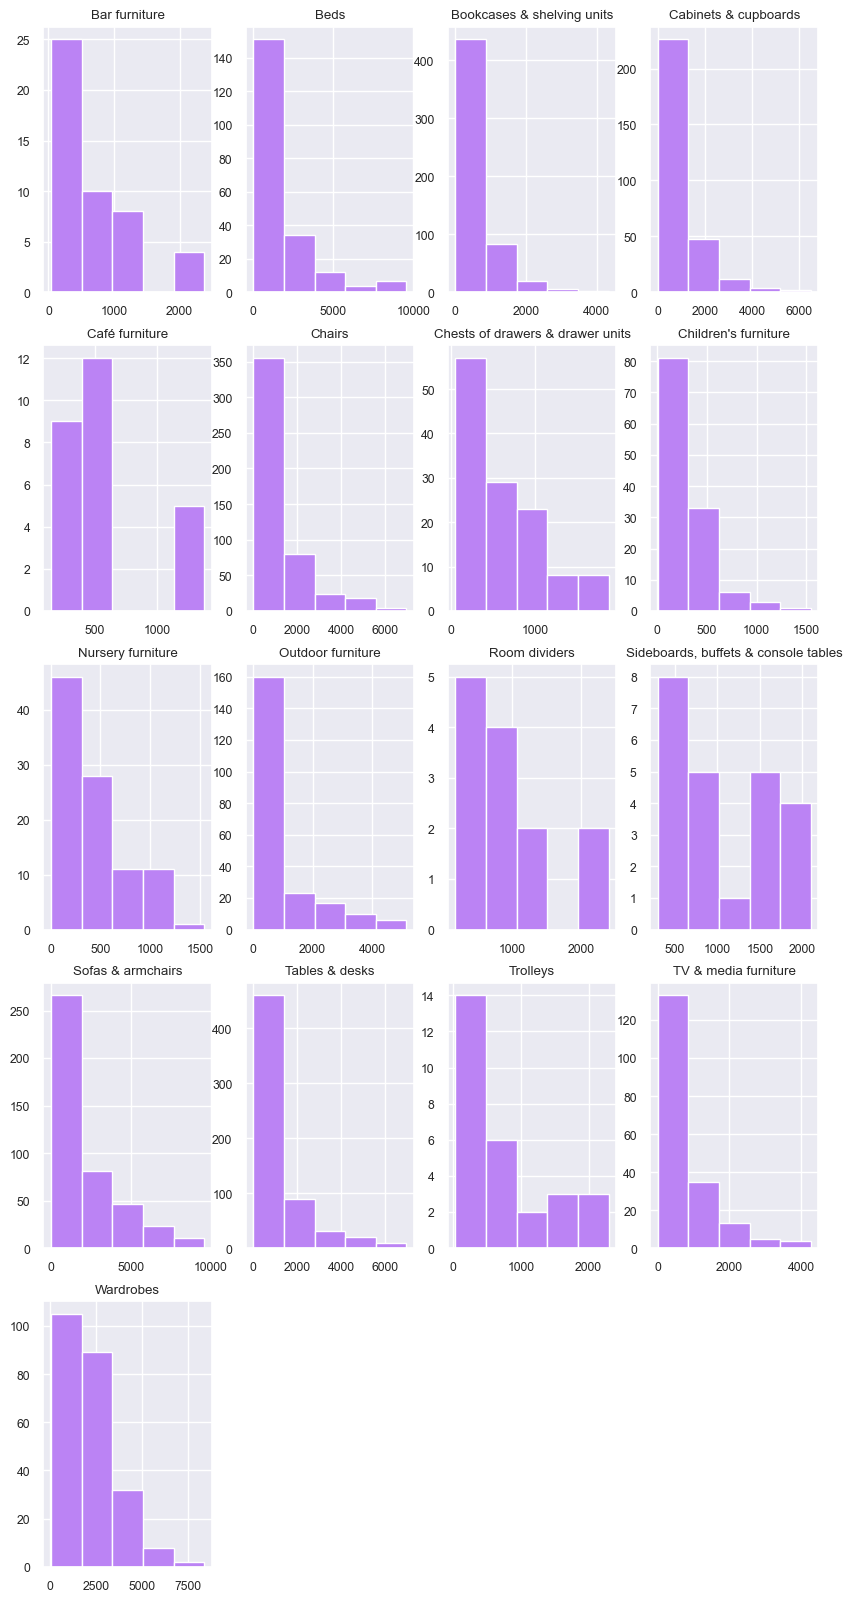

In [125]:
 
plt.figure(figsize=(10, 20))
for i, col in enumerate(list(df_act.category.unique())):
    plt.subplot(5, 4, i+1)
    data = df_act[df_act['category']==col]['price']
    plt.hist(data, bins=5, color=sns.color_palette("husl", 9).as_hex()[7])
    plt.title(col)
plt.show()

# Среди полученных распределений, вероятно, могут быть такие:
# Log Normal, Poisson, Exponential.
# Наличие Normal(Gaussian) маловероятно.

In [ ]:
# price - designer_clean
# В данных очень много различных дизайнеров, поэтому выберем только с наибольшим количеством данных (ТОП-7) 
# исходя из графика. Их список представлен выше

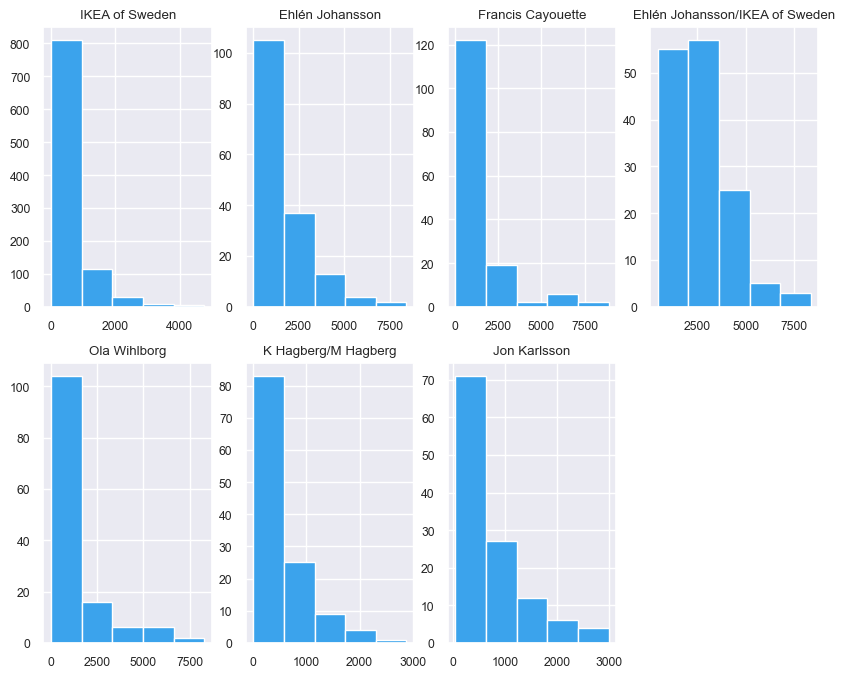

In [126]:
plt.figure(figsize=(10, 8))
for i, col in enumerate(list(df_act['designer_clean'].value_counts().iloc[:7].index)):
    plt.subplot(2, 4, i+1)
    data = df_act[df_act['designer_clean']==col]['price']
    plt.hist(data, bins=5, color=sns.color_palette("husl", 9).as_hex()[6])
    plt.title(col)
plt.show()

# Среди полученных распределений, вероятно, могут быть такие:
# Log Normal, Poisson, Exponential.
# Наличие Normal(Gaussian) маловероятно.

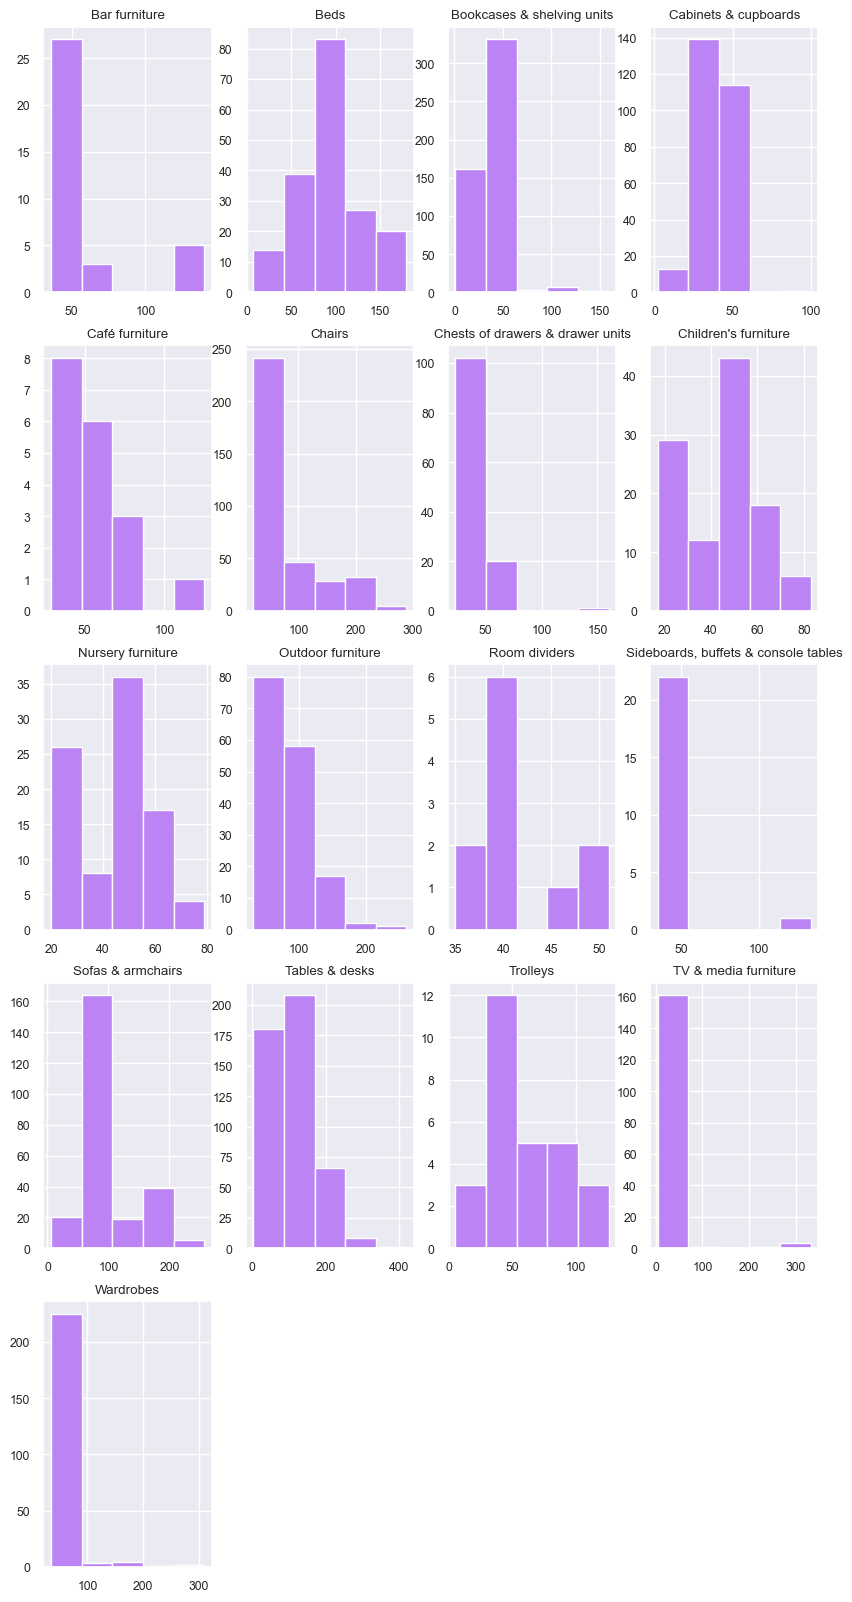

In [127]:
plt.figure(figsize=(10, 20))
for i, col in enumerate(list(df_act.category.unique())):
    plt.subplot(5, 4, i+1)
    data = df_act[df_act['category']==col]['depth_clean']
    plt.hist(data, bins=5, color=sns.color_palette("husl", 9).as_hex()[7])
    plt.title(col)
plt.show()

# Среди полученных распределений, вероятно, могут быть такие:
# Log Normal, Poisson, Exponential.
# Наличие Normal(Gaussian) маловероятно.


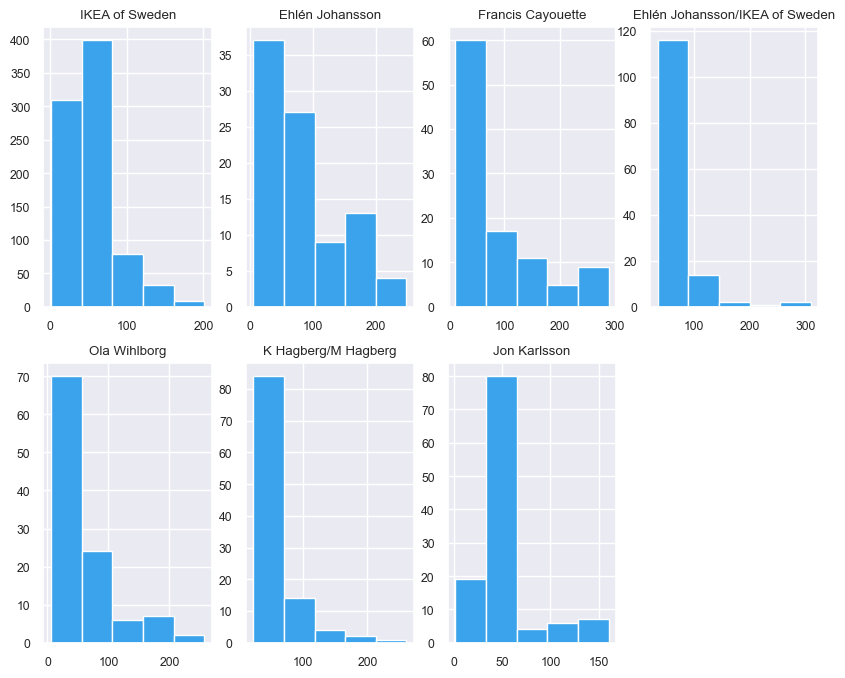

In [128]:
plt.figure(figsize=(10, 8))
for i, col in enumerate(list(df_act['designer_clean'].value_counts().iloc[:7].index)):
    plt.subplot(2, 4, i+1)
    data = df_act[df_act['designer_clean']==col]['depth_clean']
    plt.hist(data, bins=5, color=sns.color_palette("husl", 9).as_hex()[6])
    plt.title(col)
plt.show()

# Среди полученных распределений, вероятно, могут быть такие:
# Log Normal, Poisson, Exponential.
# Наличие Normal(Gaussian) маловероятно.


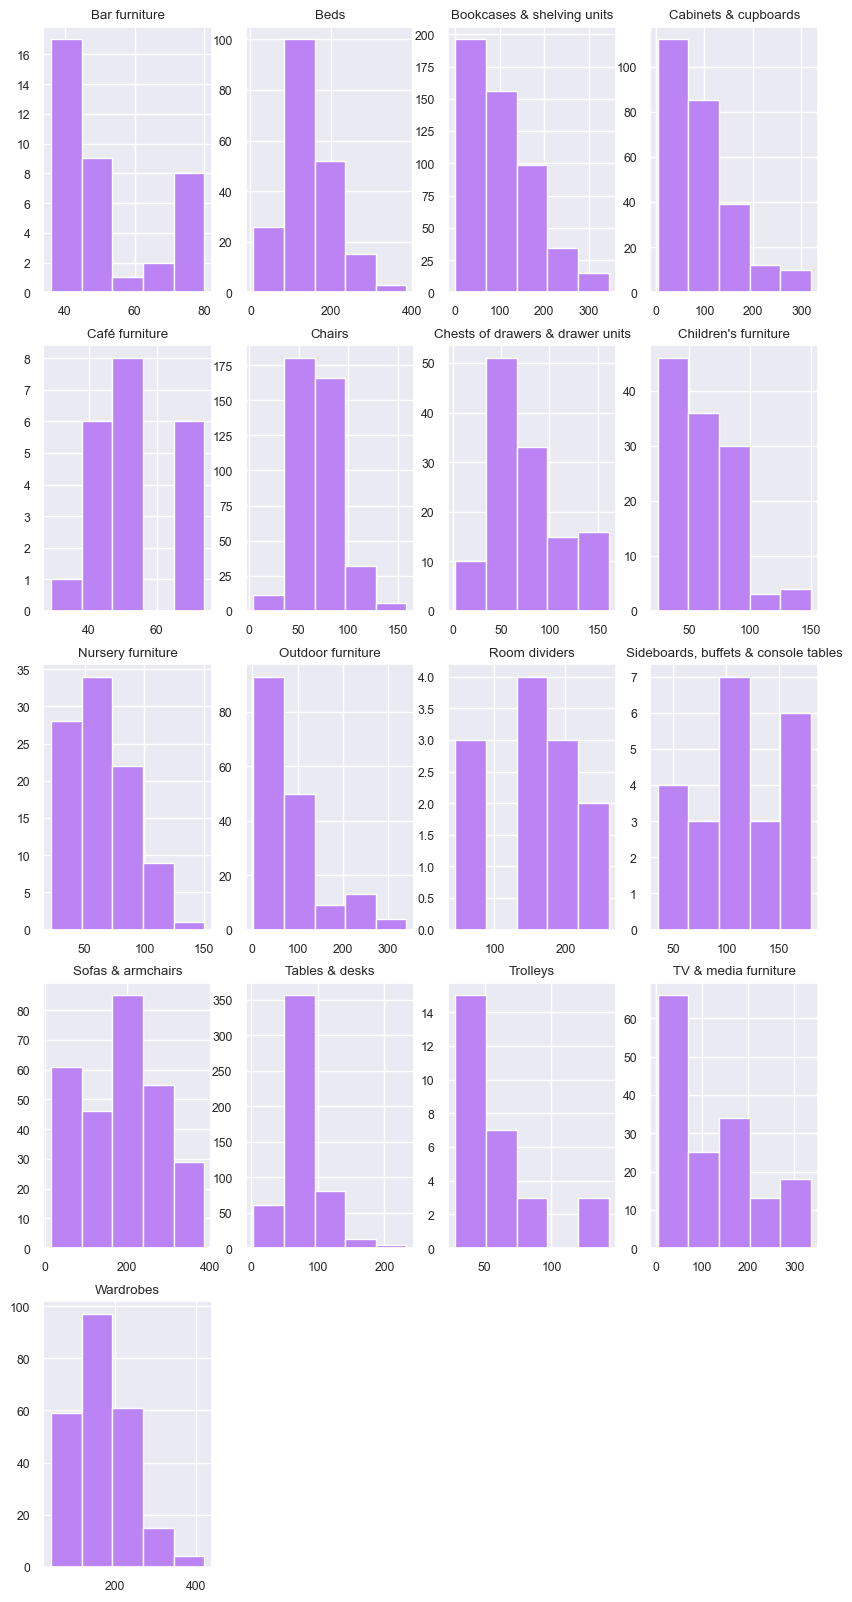

In [129]:
plt.figure(figsize=(10, 20))
for i, col in enumerate(list(df_act.category.unique())):
    plt.subplot(5, 4, i+1)
    data = df_act[df_act['category']==col]['width_clean']
    plt.hist(data, bins=5, color=sns.color_palette("husl", 9).as_hex()[7])
    plt.title(col)
plt.show()

# Среди полученных распределений, вероятно, могут быть такие:
# Log Normal, Poisson, Exponential.
# Наличие Normal(Gaussian) маловероятно.


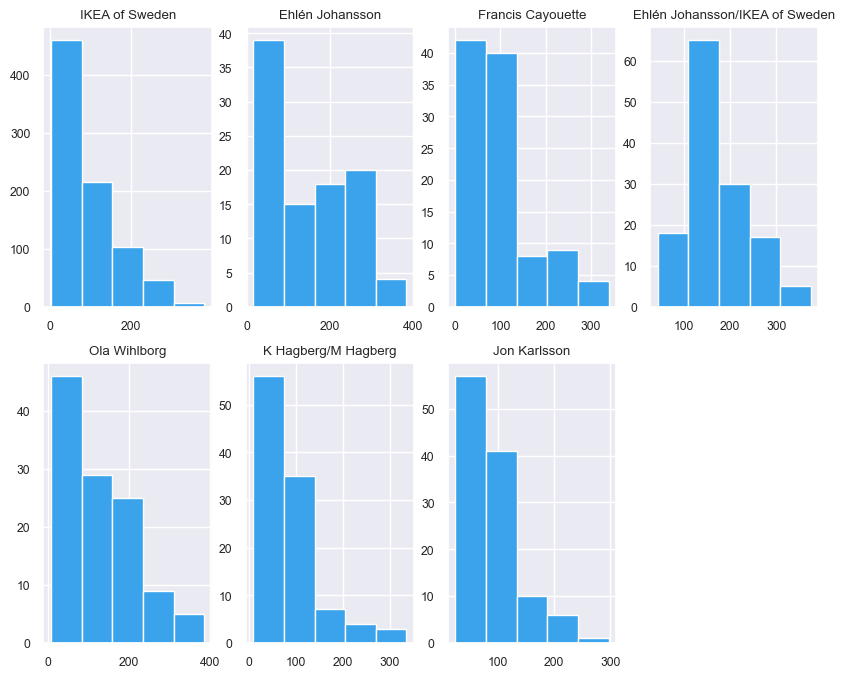

In [130]:
plt.figure(figsize=(10, 8))
for i, col in enumerate(list(df_act['designer_clean'].value_counts().iloc[:7].index)):
    plt.subplot(2, 4, i+1)
    data = df_act[df_act['designer_clean']==col]['width_clean']
    plt.hist(data, bins=5, color=sns.color_palette("husl", 9).as_hex()[6])
    plt.title(col)
plt.show()

# Среди полученных распределений, вероятно, могут быть такие:
# Log Normal, Poisson, Exponential.
# Наличие Normal(Gaussian) маловероятно.


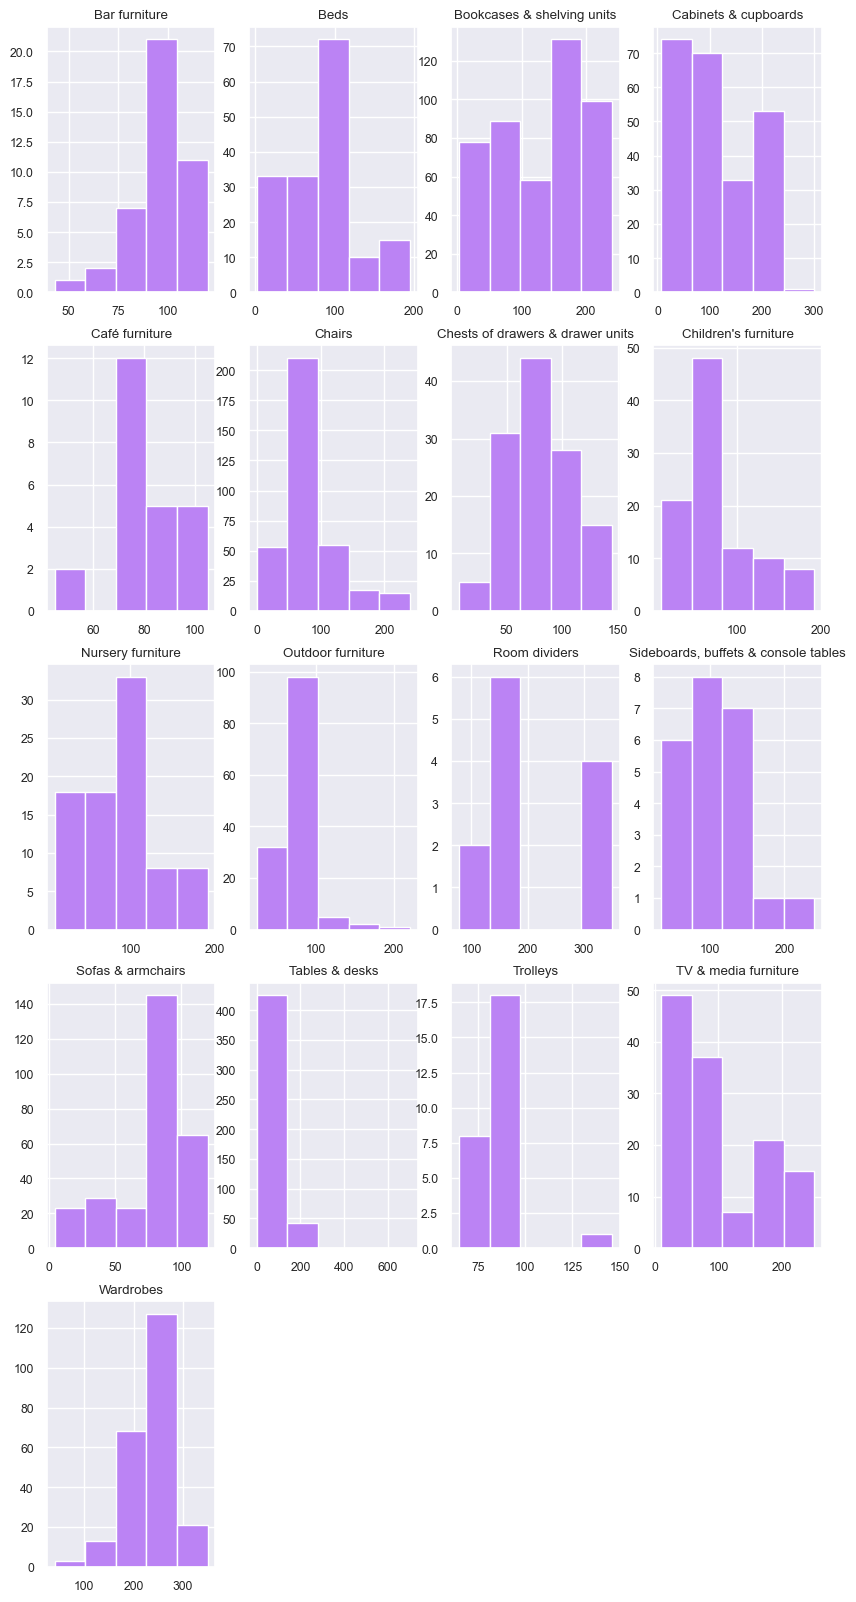

In [131]:

plt.figure(figsize=(10, 20))
for i, col in enumerate(list(df_act.category.unique())):
    plt.subplot(5, 4, i+1)
    data = df_act[df_act['category']==col]['height_clean']
    plt.hist(data, bins=5, color=sns.color_palette("husl", 9).as_hex()[7])
    plt.title(col)
plt.show()

# Среди полученных распределений, вероятно, могут быть такие:
# Log Normal, Poisson, Exponential.
# Наличие Normal(Gaussian) маловероятно.


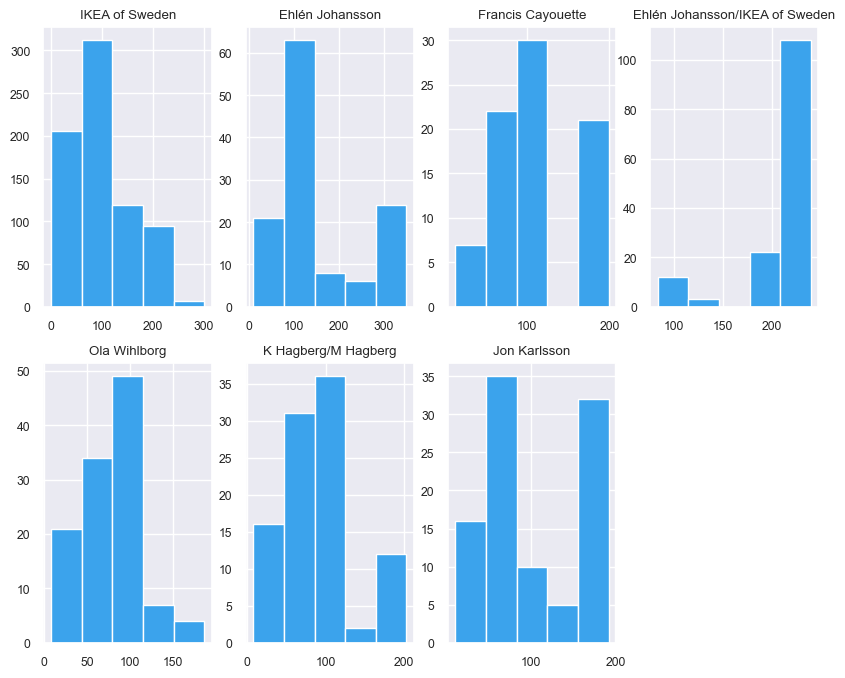

In [132]:
plt.figure(figsize=(10, 8))
for i, col in enumerate(list(df_act['designer_clean'].value_counts().iloc[:7].index)):
    plt.subplot(2, 4, i+1)
    data = df_act[df_act['designer_clean']==col]['height_clean']
    plt.hist(data, bins=5, color=sns.color_palette("husl", 9).as_hex()[6])
    plt.title(col)
plt.show()

# Среди полученных распределений, вероятно, могут быть такие:
# Log Normal, Poisson.
# Наличие Normal(Gaussian) маловероятно.


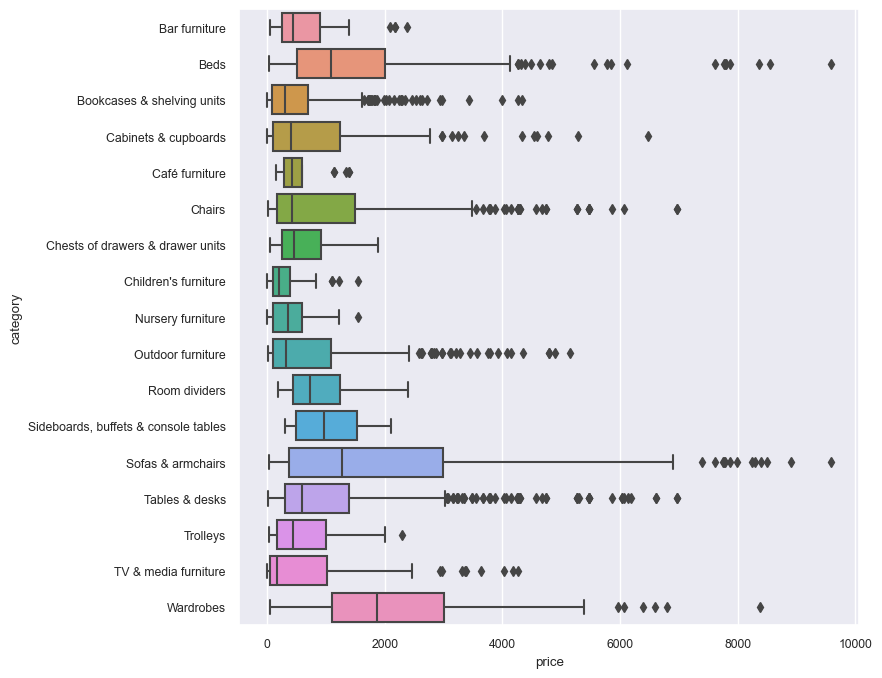

In [151]:
# Отдельно посмотрим боксплот для цен
plt.subplots(figsize=(8,8))
sns.boxplot(data=df_act, x='price', y='category')
plt.show()

# Все цены распределены очень по-разному. 
# Для отдельных категорий характерно большое количество выбросов в большом диапазоне.
# Наибольший диапазон цен для Sofas & armchairs, наименьший - для Cafe furniture и Children's furniture 
# (возможно, из-за относительно небольшого ассортимента и представленности в основном в низком ценовом сегменте).

In [ ]:
# Корреляции

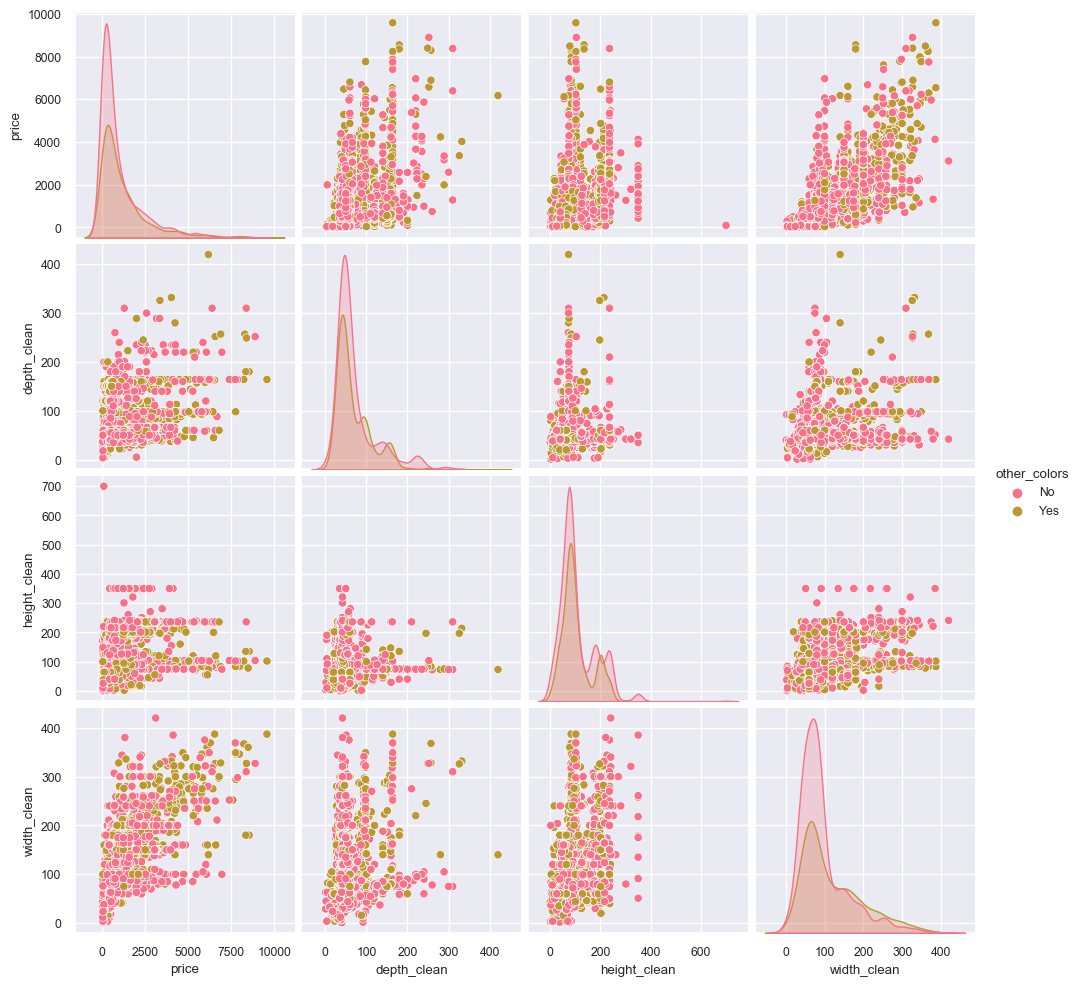

In [175]:
# Посмотрим на парные точечные графики
sns.pairplot(df_act[['price', 'depth_clean', 'height_clean', 'width_clean', 'other_colors']], hue='other_colors')
plt.show()

# Вероятно, price коррелирует с 'width_clean', с меньшей вероятностью с 'depth_clean'.
# Также вероятна корреляция 'width_clean' с 'depth_clean'.

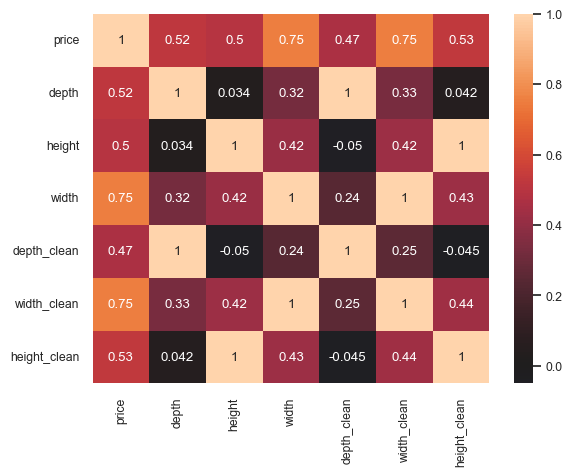

In [182]:
# Проверим наши предположения, используя график парной корреляции
plt.style.use("seaborn-pastel")
sns.heatmap(df_act.corr(method='spearman'),
           xticklabels=df_act.corr().columns,
           yticklabels=df_act.corr().columns,
           center=0,
           annot=True)
plt.show()

# Как видим, наибольшая корреляция между price и width, price и width_clean. 
# При этом, дополнение значений width из short_description не повлияло на результат. 
# А вот дополнение depth (depth и depth_clean) ослабило силу связи, и наоборот height (height и height_clean) усилило.

# В итоге имеем (по отношению к price):
# Сильная связь (от 0,7): только price и width (price и width, price и width_clean)
# Средняя (0,3 - 0,69): depth и depth_clean, height и height_clean
# Между собой больше коррелируют width_clean и height_clean
# width_clean и depth_clean имеют слабую связь (до 0,3)

In [ ]:
# корреляция для old_price

# Отдельно рассмотрим датафрейм, содержащий только данные по товарам, которые имеют старую цену.


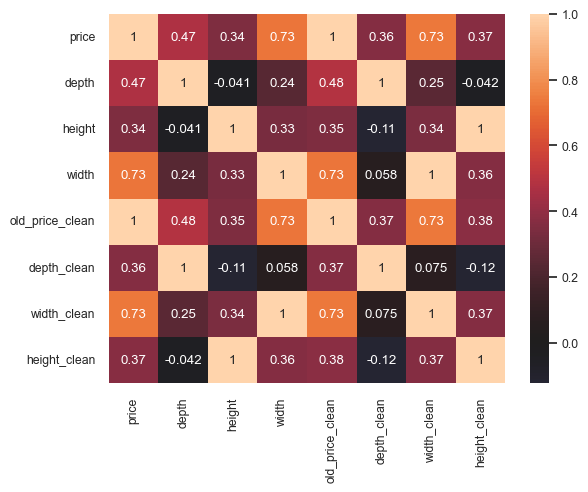

In [46]:
sns.heatmap(df_act_old_price.corr(method='spearman'),
           xticklabels=df_act_old_price.corr().columns,
           yticklabels=df_act_old_price.corr().columns,
           center=0,
           annot=True)
plt.show()
# Здесь связи с габаритами менее выражены (слабее). При этом корреляция price и old_price_clean равна 1.

In [61]:
df_act_old_price[['price', 'old_price_clean']].corr(method='spearman')
# Действительно, коэффициент корреляции price и old_price_clean практически равен 1 (0.995602).

,price,old_price_clean
price,1.000000,0.995602
old_price_clean,0.995602,1.000000


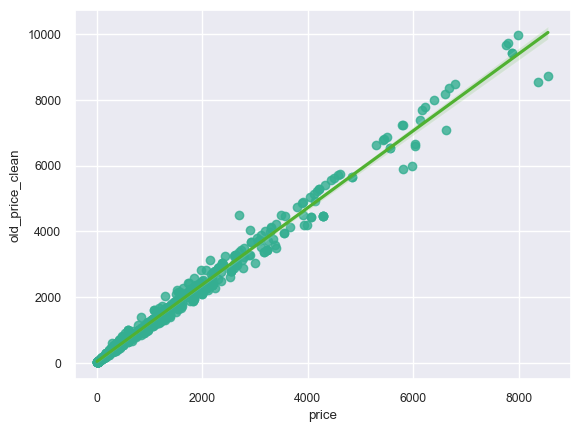

In [185]:
# Посмотрим зависимость на графике
sns.regplot(x='price', y='old_price_clean', data=df_act_old_price, 
            scatter_kws={'color':sns.color_palette(sns.color_palette("husl", 9)).as_hex()[4]}, 
            line_kws={'color':sns.color_palette(sns.color_palette("husl", 9)).as_hex()[3]})
plt.show()

# Зависимость очевидна.

In [68]:
# Рассчитаем средний процент разницы старой и новой цены.
df_act_old_price['difference'] = (df_act_old_price['old_price_clean'] - df_act_old_price['price']) / df_act_old_price['old_price_clean']*100
print(round(df_act_old_price['difference'].mean(), 0),'%')

# price была снижена в среднем на 19% относительно old_price.

19.0 %


In [ ]:
# Выводы
# Самые численные категории: Tables & desks, Bookcases & shelving units, Chairs, Sofas & armchairs.
# Самая численная группа по дизайнерам: IKEA of Sweden. Неизвестно, что в нее входит (возможно, частный бренд IKEA). 
# По численности она больше в 6 раз от других лидеров рейтинга.
# Среди остальных дизайнеров можно выделить ТОП-6. 
# Около 190 дизайнеров представляют "длинный хвост" с численностью от 75 до 1.
# Среди распределений предположительно нормального (Normal (Gaussian)) выявить не удалось.
# Чаще всего встречались предположения относительно типа распределения: Log Normal, Poisson, Exponential.
# По корреляции:
# Близкая к 1 сила связи между price и old_price_clean.
# Сильная связь между: price и width (width_clean), price и height (height_clean)
# Слабая связь: price и depth (depth_clean)

#### 3. Основываясь на EDA и вашем здравом смысле, выберите две гипотезы, которые вы хотите проверить / проанализировать. Для каждой гипотезы перечислите нулевую гипотезу и другие возможные альтернативные гипотезы, разработайте тесты, чтобы различать их, и выполните их. Опишите результаты.

In [ ]:
# Тесты

In [ ]:
# Типы распределений

![distr](images\distrib_lecture.jpg)

In [30]:
# Для выполнения дальнейшего анализа необходимо избавиться от пустых значений.
df_act_clean = df_act[['category', 'price', 'old_price_clean', 'designer_clean', 'other_colors', 'depth_clean', 'width_clean', 'height_clean']]
df_act_clean.isnull().sum()

category             0
price                0
old_price_clean      0
designer_clean       0
other_colors         0
depth_clean        679
width_clean        534
height_clean       807
dtype: int64

In [31]:
# Подготовим данные
# Заменим категориальные значения на медианы цены по дизайнерам, 1/0 для other_colors
# и заменим пустые значения габаритов на медианы по категориям.

df_act_clean['other_colors_clean'] = df_act_clean['other_colors'].map(dict(Yes=1, No=0))

median_d = df_act_clean.groupby(['category'])['depth_clean'].median()
median_h = df_act_clean.groupby(['category'])['height_clean'].median()
median_w = df_act_clean.groupby(['category'])['width_clean'].median()

median_price = df_act_clean.groupby(['category'])['price'].median()
median_dsgn = df_act_clean.groupby(['designer_clean'])['price'].median()

df_act_clean = df_act_clean.set_index(['category'])
df_act_clean['depth_m_clean'] = df_act_clean['depth_clean'].fillna(median_d)
df_act_clean['height_m_clean'] = df_act_clean['height_clean'].fillna(median_h)
df_act_clean['width_m_clean'] = df_act_clean['width_clean'].fillna(median_w)
df_act_clean['category_median_price'] = median_price
df_act_clean = df_act_clean.reset_index()

df_act_clean = df_act_clean.set_index(['designer_clean'])
df_act_clean['designer_median_price'] = median_dsgn
df_act_clean = df_act_clean.reset_index()

df_act_clean.head()

,designer_clean,category,price,old_price_clean,other_colors,depth_clean,width_clean,height_clean,other_colors_clean,depth_m_clean,height_m_clean,width_m_clean,category_median_price,designer_median_price
0,Nicholai Wiig Hansen,Bar furniture,265.0,No old price,No,51.0,51.0,99.0,0,51.0,99.0,51.0,445.0,265.0
1,Francis Cayouette,Bar furniture,995.0,No old price,No,140.0,80.0,105.0,0,140.0,105.0,80.0,445.0,458.0
2,Francis Cayouette,Bar furniture,2095.0,No old price,No,NaN,NaN,NaN,0,50.0,102.0,48.0,445.0,458.0
3,Henrik Preutz,Bar furniture,69.0,No old price,Yes,50.0,60.0,100.0,1,50.0,100.0,60.0,445.0,495.0
4,Marcus Arvonen,Bar furniture,225.0,No old price,No,60.0,74.0,43.0,0,60.0,43.0,74.0,445.0,150.0


In [83]:
# Для анализа оставим только те строки, где есть старая цена

df_act_clean_old = df_act_clean[df_act_clean['old_price_clean'] != 'No old price']
df_act_clean_old['old_price_clean'] = df_act_clean_old['old_price_clean'].astype(float)
df_act_clean_old.head()

,designer_clean,category,price,old_price_clean,other_colors,depth_clean,width_clean,height_clean,other_colors_clean,depth_m_clean,height_m_clean,width_m_clean,category_median_price,designer_median_price
9,Ehlén Johansson,Bar furniture,2176.0,2375.0,No,NaN,NaN,NaN,0,50.0,102.0,48.0,445.0,1280.0
13,Nicholai Wiig Hansen,Bar furniture,177.0,295.0,No,53.0,43.0,104.0,0,53.0,104.0,43.0,445.0,265.0
17,Sarah Fager,Bar furniture,140.0,175.0,Yes,36.0,36.0,NaN,1,36.0,102.0,36.0,445.0,157.5
23,Ehlén Johansson,Bar furniture,796.0,995.0,No,120.0,80.0,105.0,0,120.0,105.0,80.0,445.0,1280.0
26,Ehlén Johansson,Bar furniture,796.0,995.0,No,120.0,80.0,105.0,0,120.0,105.0,80.0,445.0,1280.0


In [ ]:
# Гипотеза 1: совпадают ли распределения цены и старой цены
# Н_0 - совпадают
# Н_1 - не совпадают


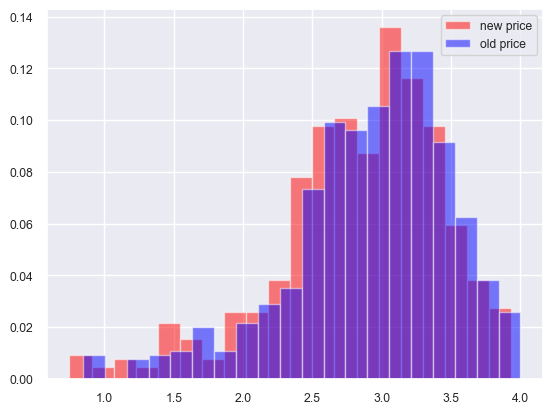

In [133]:
new_price = df_act_clean_old['price'].apply(np.log10)
old_price = df_act_clean_old['old_price_clean'].apply(np.log10)
new_price.name, old_price.name = 'new price', 'old price'

new_price.hist(alpha=0.5, color='red', weights=[1./len(new_price)]*len(new_price), bins=20)
old_price.hist(alpha=0.5, color='blue', weights=[1./len(old_price)]*len(old_price), bins=20)

plt.legend([new_price.name, old_price.name])
plt.show()

In [86]:
# Проверим с помощью критерия Манна-Уитни из одного ли распределения актуальные цены и старые цены
stats.mannwhitneyu(new_price, old_price).pvalue

# Значение p менее 5% (около 0,4%), значит гипотеза Н_0 опровергнута.
# Распределения старых и новых цен отличаются и разница статистически значима. 


0.003885296392443449

In [ ]:
# Гипотеза 2: является ли распределение width_clean логнормальным
# Н_0 - является логнормальным распределением
# Н_1 - не является логнормальным распределением

# Использовать будем данные без дополненных медианных значений вместо пустых, чтобы они не повлияли на результат. 
# Пустые удалим.

In [93]:
width_test = df_act['width_clean'].dropna()
width_test.head()

0    51.0
1    80.0
3    60.0
4    74.0
5    40.0
Name: width_clean, dtype: float64

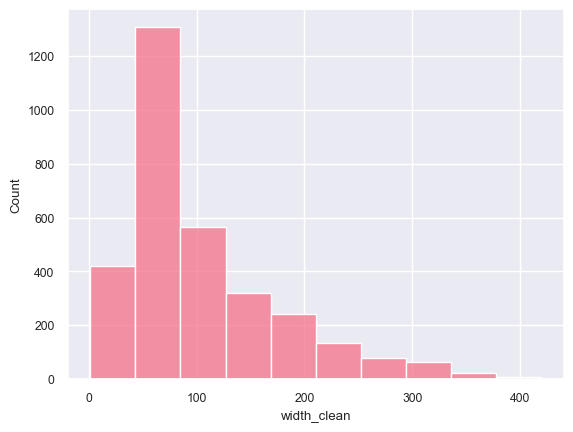

In [134]:
# гистограммa для данных по ширине товаров
sns.histplot(width_test, bins=10)
plt.show()

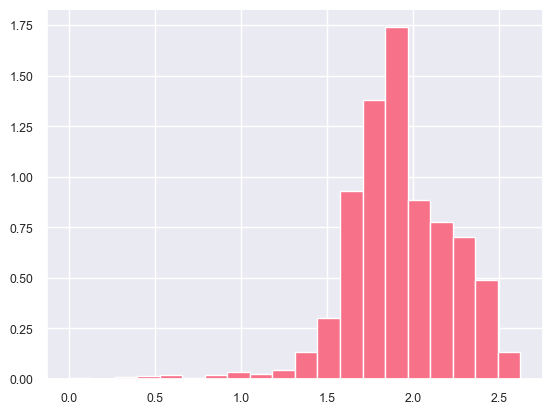

In [135]:
# Гистограмма логарифма данных по ширине
plt.hist(np.log10(width_test), bins=20, density=True)
plt.show()


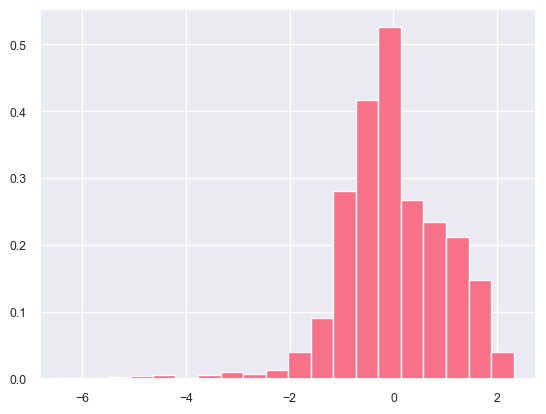

In [136]:
# Если есть предположение о нормальности распределения, то необходима процедура стандартизации данных

width_test_st = (np.log10(width_test) - np.log10(width_test).mean())/np.log10(width_test).std()

hist_h = plt.hist(width_test_st, bins=20, density=True)
plt.show()

# графики по форме аналогичны

In [104]:
h0_1_p_value = stats.shapiro(width_test_st).pvalue
h0_1_p_value_1 = stats.shapiro(np.log10(width_test)).pvalue
h0_1_p_value_2 = stats.kstest(width_test_st, cdf=stats.norm.cdf).pvalue
h0_1_p_value_3 = stats.normaltest(width_test_st).pvalue
h0_1_p_value_4 = stats.ks_2samp(width_test_st, stats.norm.rvs(size=len(width_test_st))).pvalue
h0_1_p_value_5 = stats.mannwhitneyu(width_test_st, stats.norm.rvs(size=len(width_test_st))).pvalue

print('p-value:', h0_1_p_value, h0_1_p_value_1, h0_1_p_value_2, h0_1_p_value_3, h0_1_p_value_4, h0_1_p_value_5, sep='\n')


p-value:
3.707269569725023e-30
3.709737167466269e-30
1.154267419738023e-12
1.4791115839115281e-92
5.073064980993e-07
0.4779190603699931


In [ ]:
# p очень маленькое, гипотеза опровергнута.

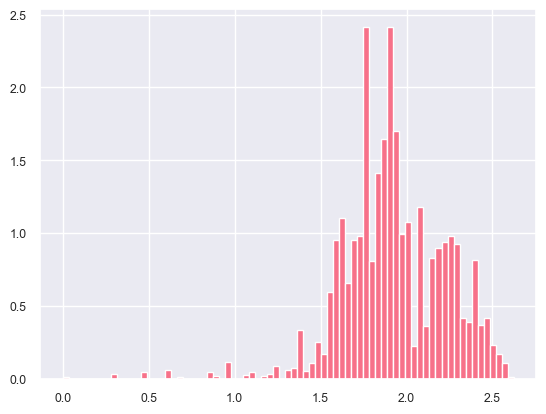

In [137]:
plt.hist(np.log10(width_test), bins=75, density=True)
plt.show()

# Существенное увеличение bins показало наличие выбросов и разрывов

#### 4. Обучите модель предсказывать цену на мебель.
- Укажите, какие столбцы не следует включать в модель ипочему. 
- Создайте конвейер перекрестной проверки для обучения и оценки модели, включая (при необходимости) такие шаги как,  вменение пропущенных значений и нормализация.
- Предложите методы повышения производительности модели. Опишите результаты.

In [ ]:
# Прогноз цен

# Так как все необходимые трансформации данных мы уже выполнили, то нет необходимости использовать Pipeline

In [107]:
def getBestRegressor(X, Y):
    X_train, X_test, Y_train, Y_test = sk.model_selection.train_test_split(X, Y, test_size=0.2, random_state=42)
    models = [
        sk.linear_model.LinearRegression(),
        sk.linear_model.LassoCV(),
        sk.linear_model.RidgeCV(),
        sk.svm.SVR(kernel='linear'),
        sk.neighbors.KNeighborsRegressor(n_neighbors=16),
        sk.tree.DecisionTreeRegressor(max_depth=10, random_state=42),
        RandomForestRegressor(random_state=42),
        GradientBoostingRegressor()
    ]
    TestModels = pd.DataFrame()
    tmp = {}
    for model in models:
        m = str(model)
        tmp['Model'] = m[:m.index('(')]
        model.fit(X_train, Y_train)
        tmp['R^2'] = '{:.5f}'.format(model.score(X_test, Y_test))
        tmp['MAE'] = '{:.5f}'.format(sk.metrics.mean_absolute_error(model.predict(X_test), Y_test))
        tmp['RMSE'] = '{:.5f}'.format(np.sqrt(sk.metrics.mean_squared_error(model.predict(X_test), Y_test)))
        
        TestModels = pd.concat([TestModels, pd.DataFrame([tmp])])
    TestModels.set_index('Model', inplace=True)
    return {'model': TestModels, 'X_train': X_train, 'Y_train': Y_train, 'X_test': X_test, 'Y_test': Y_test}

In [108]:
X1 = df_act_clean[['depth_m_clean', 'height_m_clean', 'width_m_clean', 'category_median_price', 'designer_median_price', 'other_colors_clean']]
Y1 = df_act_clean['price']

test1 = getBestRegressor(X1, Y1)
test1['model'].sort_values(by='R^2', ascending=False)

,R^2,MAE,RMSE
Model,,,
RandomForestRegressor,0.85289,279.18139,532.50317
GradientBoostingRegressor,0.83794,344.89795,558.89464
DecisionTreeRegressor,0.77850,351.83360,653.40361
LinearRegression,0.74175,478.99724,705.53556
RidgeCV,0.74175,478.97820,705.52786
LassoCV,0.74117,473.73415,706.32208
KNeighborsRegressor,0.72459,409.44223,728.59073
SVR,0.71111,442.48499,746.20627


In [ ]:
# Наилучший результат - RandomForestRegressor (R^2 близок к 90). Также он лучший и по MAE, RMSE

In [ ]:
# Оптимизация

In [ ]:
# Попробуем использовать датафрейм с медианами вместо пустых, но содержащий только строки, где есть старая цена

In [111]:
df_act_clean_old_price = df_act_clean[df_act_clean['old_price_clean']!='No old price']
df_act_clean_old_price

,designer_clean,category,price,old_price_clean,other_colors,depth_clean,width_clean,height_clean,other_colors_clean,depth_m_clean,height_m_clean,width_m_clean,category_median_price,designer_median_price
9,Ehlén Johansson,Bar furniture,2176.0,2375.0,No,NaN,NaN,NaN,0,50.0,102.0,48.0,445.0,1280.0
13,Nicholai Wiig Hansen,Bar furniture,177.0,295.0,No,53.0,43.0,104.0,0,53.0,104.0,43.0,445.0,265.0
17,Sarah Fager,Bar furniture,140.0,175.0,Yes,36.0,36.0,NaN,1,36.0,102.0,36.0,445.0,157.5
23,Ehlén Johansson,Bar furniture,796.0,995.0,No,120.0,80.0,105.0,0,120.0,105.0,80.0,445.0,1280.0
26,Ehlén Johansson,Bar furniture,796.0,995.0,No,120.0,80.0,105.0,0,120.0,105.0,80.0,445.0,1280.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3689,Ehlén Johansson,Wardrobes,750.0,820.0,No,50.0,91.0,350.0,0,50.0,350.0,91.0,1870.0,1280.0
3690,Ehlén Johansson,Wardrobes,1572.0,1755.0,No,50.0,135.0,350.0,0,50.0,350.0,135.0,1870.0,1280.0
3691,Ehlén Johansson,Wardrobes,924.0,1050.0,No,50.0,175.0,350.0,0,50.0,350.0,175.0,1870.0,1280.0
3692,Ehlén Johansson,Wardrobes,2745.0,3130.0,No,50.0,178.0,350.0,0,50.0,350.0,178.0,1870.0,1280.0


In [113]:
X2 = df_act_clean_old_price[['depth_m_clean', 'height_m_clean', 'width_m_clean', 'category_median_price', 'designer_median_price', 'other_colors_clean', 'old_price_clean']]
Y2 = df_act_clean_old_price['price']

Fitting 5 folds for each of 120 candidates, totalling 600 fits
Best Estimator: RandomForestRegressor(max_features='auto')
Best Score: 0.9896426823656526

R^2:0.98995
MAE:76.13437
RMSE:124.95866

Feature importance:
-----------------------------------
0.00128    depth_m_clean
0.00097    height_m_clean
0.00133    width_m_clean
0.00057    category_median_price
0.00298    designer_median_price
0.00014    other_colors_clean
0.99273    old_price_clean


<AxesSubplot:>

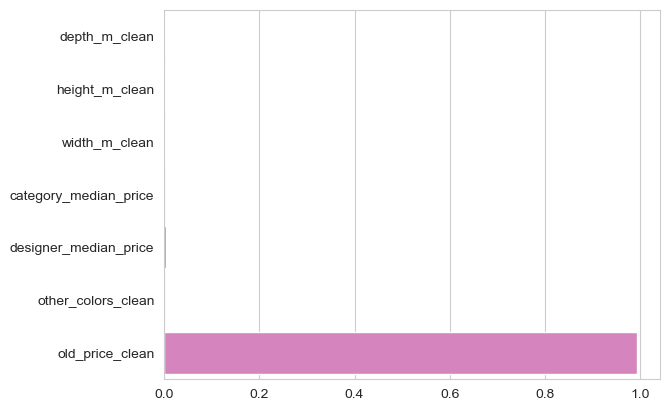

In [114]:
from sklearn.model_selection import GridSearchCV

X_train, X_test, Y_train, Y_test = sk.model_selection.train_test_split(X2, Y2, test_size=0.2, random_state=42)
forest_grid = GridSearchCV(RandomForestRegressor(), {'n_estimators': [10,50,100,110,120,130,140,150,200,500],
                                                    'max_depth': [10,100,200,None],
                                                    'max_features': ['auto', 'sqrt', 'log2']}, cv=5, n_jobs=-1, verbose=3)
forest_grid.fit(X_train, Y_train)

print('Best Estimator:', forest_grid.best_estimator_)
print('Best Score:', forest_grid.best_score_)
print('')
print('R^2:{:.5f}'.format(sk.metrics.r2_score(Y_test, forest_grid.predict(X_test))))
print('MAE:{:.5f}'.format(sk.metrics.mean_absolute_error(forest_grid.predict(X_test), Y_test)))
print('RMSE:{:.5f}'.format(np.sqrt(sk.metrics.mean_squared_error(forest_grid.predict(X_test), Y_test))))
print('')
print('Feature importance:')
print('-----------------------------------')

for feat, importance in zip(X_train.columns, forest_grid.best_estimator_.feature_importances_):
    print('{:.5f}    {f}'.format(importance, f=feat))
    
sns.set_style('whitegrid')
sns.barplot(y=X_train.columns, x=forest_grid.best_estimator_.feature_importances_)

In [ ]:
# Как видно, результат значительно улучшился. R^2:0.98995. MAE и RMSE также значительно меньше, чем в предудущем тесте.
# В принципе, результат ожидаем, так как корреляция между price и old_price близилась к 1.


In [ ]:
# UPD:
# Из рекомендаций:
# Попробовать "синтетические фичи из размеров, объем, например."
# 

In [32]:
df_act_clean_volume = df_act_clean
df_act_clean_volume['Volume'] = df_act_clean_volume['depth_m_clean']*df_act_clean_volume['height_m_clean']*df_act_clean_volume['width_m_clean']
df_act_clean_volume.head()

,designer_clean,category,price,old_price_clean,other_colors,depth_clean,width_clean,height_clean,other_colors_clean,depth_m_clean,height_m_clean,width_m_clean,category_median_price,designer_median_price,Volume
0,Nicholai Wiig Hansen,Bar furniture,265.0,No old price,No,51.0,51.0,99.0,0,51.0,99.0,51.0,445.0,265.0,257499.0
1,Francis Cayouette,Bar furniture,995.0,No old price,No,140.0,80.0,105.0,0,140.0,105.0,80.0,445.0,458.0,1176000.0
2,Francis Cayouette,Bar furniture,2095.0,No old price,No,NaN,NaN,NaN,0,50.0,102.0,48.0,445.0,458.0,244800.0
3,Henrik Preutz,Bar furniture,69.0,No old price,Yes,50.0,60.0,100.0,1,50.0,100.0,60.0,445.0,495.0,300000.0
4,Marcus Arvonen,Bar furniture,225.0,No old price,No,60.0,74.0,43.0,0,60.0,43.0,74.0,445.0,150.0,190920.0


In [37]:
X3 = df_act_clean_volume[['depth_m_clean', 'height_m_clean', 'width_m_clean', 'category_median_price', 'designer_median_price', 'other_colors_clean', 'Volume']]
Y3 = df_act_clean_volume['price']

Fitting 5 folds for each of 120 candidates, totalling 600 fits
Best Estimator: RandomForestRegressor(max_depth=200, max_features='log2', n_estimators=200)
Best Score: 0.8507589696020966

R^2:0.87693
MAE:268.05849
RMSE:487.04547

Feature importance:
-----------------------------------
0.09834    depth_m_clean
0.06357    height_m_clean
0.21667    width_m_clean
0.05053    category_median_price
0.26790    designer_median_price
0.01561    other_colors_clean
0.28738    Volume


<AxesSubplot:>

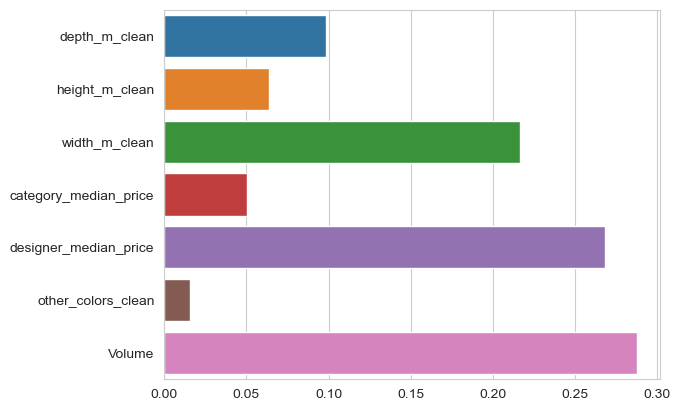

In [38]:
from sklearn.model_selection import GridSearchCV

X_train, X_test, Y_train, Y_test = sk.model_selection.train_test_split(X3, Y3, test_size=0.2, random_state=42)
forest_grid = GridSearchCV(RandomForestRegressor(), {'n_estimators': [10,50,100,110,120,130,140,150,200,500],
                                                    'max_depth': [10,100,200,None],
                                                    'max_features': ['auto', 'sqrt', 'log2']}, cv=5, n_jobs=-1, verbose=3)
forest_grid.fit(X_train, Y_train)

print('Best Estimator:', forest_grid.best_estimator_)
print('Best Score:', forest_grid.best_score_)
print('')
print('R^2:{:.5f}'.format(sk.metrics.r2_score(Y_test, forest_grid.predict(X_test))))
print('MAE:{:.5f}'.format(sk.metrics.mean_absolute_error(forest_grid.predict(X_test), Y_test)))
print('RMSE:{:.5f}'.format(np.sqrt(sk.metrics.mean_squared_error(forest_grid.predict(X_test), Y_test))))
print('')
print('Feature importance:')
print('-----------------------------------')

for feat, importance in zip(X_train.columns, forest_grid.best_estimator_.feature_importances_):
    print('{:.5f}    {f}'.format(importance, f=feat))
    
sns.set_style('whitegrid')
sns.barplot(y=X_train.columns, x=forest_grid.best_estimator_.feature_importances_)

In [ ]:
# Volume показал наилучший результат (больший, чем все остальные существующие в датафрейме фичи)
# Наилучший оценщик - RandomForestRegressor